In [93]:
import numpy as np
import scipy as sp
import sympy as sm
import pandas as pd
import timeit

In [94]:
x = sm.Symbol('x')

## Higher potential to move from equilibrium to another ##

In [95]:
df = 0.01*((1/6)*x**6 - (1/3)*x**3 - (1/0.05)*x**2 - 1.5*x - 1.*x**3)
Vdf = -1*sm.diff(df, x)
Vdf

-0.01*x**5 + 0.04*x**2 + 0.4*x + 0.015

In [96]:
k = np.arange(2, 5, 0.5)
xvls = np.linspace(-4, 4, 1000)

<IPython.core.display.Javascript object>


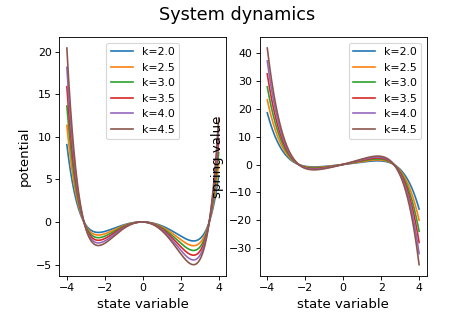

In [98]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('System dynamics',fontsize =16)

for i in np.arange(len(k)):

    y2int = k[i]*df
    y2int_fun = sm.lambdify(x, y2int)

    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)

    ttl = "k=" + str(np.around(k[i], 1))

    ax1.plot(xvls,y2int_fun(xvls), label = ttl)
    ax1.set_xlabel("state variable", fontsize =12 ); ax1.set_ylabel("potential", fontsize =12)

    ax2.plot(xvls,(y1dif_fun(xvls)), label = ttl)
    ax2.set_xlabel("state variable", fontsize =12); ax2.set_ylabel("spring value", fontsize =12)

    ax1.legend()
    ax2.legend()

## Relatively lower potential to move from equilibrium to another##

In [99]:
df0 = 1.25*(0.15 * x**2 * (0.15 * x**2 - 1)+0)
Vdf0 = -1*sm.diff(df, x)
Vdf0

-0.01*x**5 + 0.04*x**2 + 0.4*x + 0.015

In [100]:
df0.expand()

0.028125*x**4 - 0.1875*x**2

In [101]:
sm.solve(df0)

[-2.58198889747161, 0.0, 2.58198889747161]

In [102]:
k = np.arange(2, 5, 0.5)
xvls = np.linspace(-4, 4, 1000)

<IPython.core.display.Javascript object>


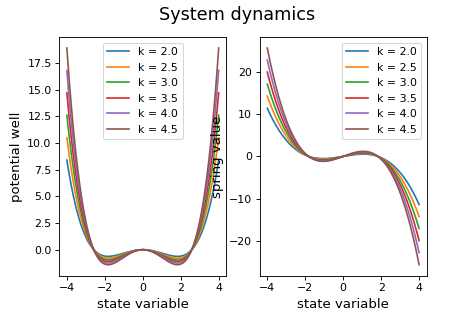

In [103]:
%matplotlib notebook
fig,  (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('System dynamics', fontsize =16)

for i in np.arange(len(k)):

    y2int0 = k[i]*df0
    y2int_fun0 = sm.lambdify(x, y2int0)

    y1dif0 = -1*sm.diff(y2int0, x)
    y1dif_fun0 = sm.lambdify(x, y1dif0)

    ttl = "k = " + str(np.around(k[i], 1))

    ax1.plot(xvls, y2int_fun0(xvls), label = ttl)
    ax1.set_xlabel("state variable", fontsize =12 ); ax1.set_ylabel("potential well", fontsize =12)

    ax2.plot(xvls, y1dif_fun0(xvls), label = ttl)
    ax2.set_xlabel("state variable", fontsize =12); ax2.set_ylabel("spring value", fontsize =12)

    ax1.legend()
    ax2.legend()

## Showing the difference in the potential b/w 2 scenarios ##

In [104]:
xvls = np.linspace(-4, 4, 1000)
y2int0 = 4*df0
y2int_fun0 = sm.lambdify(x, y2int0)

In [105]:
df0

0.1875*x**2*(0.15*x**2 - 1)

In [106]:
y2int0

0.75*x**2*(0.15*x**2 - 1)

In [107]:
df

0.00166666666666667*x**6 - 0.0133333333333333*x**3 - 0.2*x**2 - 0.015*x

In [108]:
y2int

0.0075*x**6 - 0.06*x**3 - 0.9*x**2 - 0.0675*x

<IPython.core.display.Javascript object>


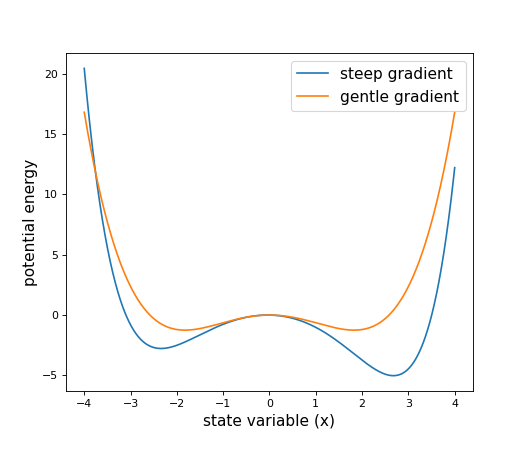

In [113]:
%matplotlib notebook
plt.plot(xvls, y2int_fun(xvls), label = "steep gradient")
plt.plot(xvls, y2int_fun0(xvls), label = "gentle gradient")
plt.xlabel("state variable (x)",fontsize=14); plt.ylabel("potential energy",fontsize=14);
plt.legend(fontsize=14)
plt.show()

In [114]:
lp = y2int_fun0(xvls); hp = y2int_fun(xvls)

from scipy.signal import argrelextrema
maxs = np.array(argrelextrema(np.array(lp), np.greater))
mins = np.array(argrelextrema(np.array(lp), np.less))


(lp[maxs] - lp[mins[0]][0])/(xvls[maxs[0]] - xvls[mins[0][0]])

maxs1 = np.array(argrelextrema(np.array(hp), np.greater))
mins1 = np.array(argrelextrema(np.array(hp), np.less))

print(np.abs((hp[maxs1] - hp[mins1[0]][1])/(xvls[maxs1[0]] - xvls[mins1[0][1]])))

print(np.abs((hp[maxs1] - hp[mins1[0]][0])/(xvls[maxs1[0]] - xvls[mins1[0][0]])))


[[1.85007144]]
[[1.20161475]]


## Damping function with higher and lower ability to withstand ##


In [115]:
mu, x = sm.symbols('mu x')
vdp = mu*(3.5-0.25*x**3 + 2*x)
vdp1 = sm.lambdify([mu, x], vdp)

<IPython.core.display.Javascript object>


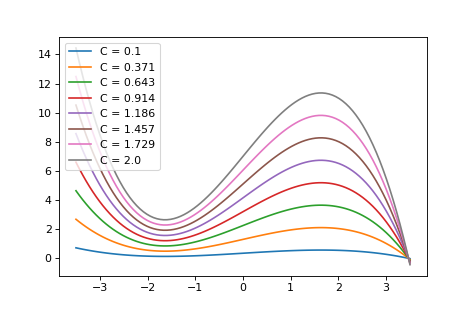

In [116]:
mu_rg = np.linspace(0.1, 2, 8)
x_rg = np.linspace(-3.5, 3.5, 100)

%matplotlib notebook
for i in np.arange(len(mu_rg)):
    vpd_vl = vdp1(mu_rg[i], x_rg)

    ttl = "C = " + str(np.around(mu_rg[i], 3))
    plt.plot(x_rg, vpd_vl, label = ttl)
    plt.legend()
    plt.show()

In [117]:
I0, k, c, F, Ac_F, r, F_p = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
c

A_c_F/(1 + exp(-r*(F - F_p))) + I0

In [118]:
c1 = c.subs({I0 : 0.25, Ac_F: 4, r : 1.2, F_p : 2.5})
c2 = sm.lambdify(F, c1, "numpy" )
c1

0.25 + 4/(1 + 20.0855369231877*exp(-1.2*F))

In [120]:
t, f0 = sm.symbols('t, f_0')

F = f0*sm.sin(t) + 0.1*f0
F

f_0*sin(t) + 0.1*f_0

In [121]:
F1 = sm.lambdify([f0, t], F, "numpy")
tm = np.linspace(0, 100, 10001)
F2=F1(10,tm)
F2

array([ 1.        ,  1.09999833,  1.19998667, ..., -4.23509599,
       -4.14963368, -4.06365641])

<IPython.core.display.Javascript object>


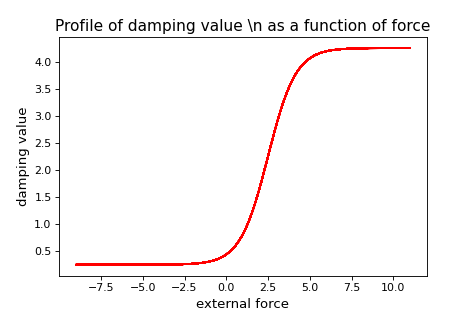

Text(0.5, 1.0, 'Profile of damping value \\n as a function of force')

In [122]:
%matplotlib notebook
plt.plot(F2, c2(F2), c = 'red'),
plt.xlabel("external force",fontsize =12); plt.ylabel("damping value", fontsize =12)
plt.title("Profile of damping value \\n as a function of force", fontsize =14)

In [123]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
k1 = c.subs({I0 : 0.5, Ac_F: 2, r : 0.6, F_p : 0.5})
k2 = sm.lambdify(F, k1, "numpy" )

Text(0.5, 1.0, 'Profile of spring value \\n as a function of force')

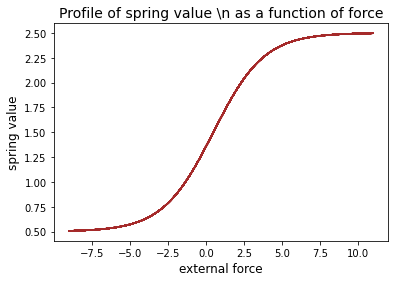

In [124]:
%matplotlib inline
plt.plot(F2, k2(F2), c = 'brown')
plt.xlabel("external force", fontsize =12); plt.ylabel("spring value", fontsize =12)
plt.title("Profile of spring value \\n as a function of force", fontsize =14)

In [125]:
df0 = 1.25*(0.15 * x**2 * (0.15 * x**2 - 1)+0)

def nonSDMS_nonF_fun_LP(t, u, M, tend, t_step, F):

    from scipy.interpolate import interp1d

    x1 = u[0]
    x2 = u[1]

    xs = np.arange(len(F))
    y_interp = interp1d(xs, F)
    Frc = y_interp(t/t_step)


    ##Force dependent spring-damper##
    Ki = k2(Frc); Ci = c2(Frc) 
#     print(['Ki', Ki]); print(['Ci', Ci])
    ##Dynamic potential##

    y2int = Ki*df0
    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)
    spring_val = (y1dif_fun(x1))
#     print(["spring cons = ", spring_val ])

    ##Dynamic damper 
    damp_cons = Ci*0.5*(3.5-0.25*x1**3 + 2*x1)
#     print(["damper cons = ", damp_cons ])

    du = np.zeros([2, 1])

    du[0] = x2
    du[1] = (1/M)*(Frc - damp_cons*x2 + spring_val)

    du = du.reshape(2)

    return(du)

In [126]:
def nonSDMS_nonF_fun_HP(t, u, M, tend, t_step, F):

    from scipy.interpolate import interp1d

    x1 = u[0]
    x2 = u[1]

    xs = np.arange(len(F))
    y_interp = interp1d(xs, F)
    Frc = y_interp(t/t_step)

    # print(t)
#     print(["force= ", Frc])
    ##Force dependent spring-damper##
    Ki = k2(Frc); Ci = c2(Frc) 
#     print(['Ki', Ki]); print(['Ci', Ci])
    ##Dynamic potential##

    y2int = Ki*df
    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)
    spring_val = (y1dif_fun(x1))
#     print(["spring cons = ", spring_val ])

    ##Dynamic damper 
    damp_cons = Ci*0.5*(3.5-0.25*x1**3 + 2*x1)
#     print(["damper cons = ", damp_cons ])

    du = np.zeros([2, 1])

    du[0] = x2
    du[1] = (1/M)*(Frc - damp_cons*x2 + spring_val)

    du = du.reshape(2)

    return(du)


In [127]:
import random as rn
import pylab as pl

%matplotlib inline
def varying_extForce(N, Ts, ampl, mg):
    x0=pl.arange(0,N,Ts)
    sigs = np.zeros([10, len(x0)])

    phi = pl.linspace(0.001, 0.3, 100)
    amp = pl.linspace(2, 5, 100)

    for i in np.arange(10):

        amp1 = amp[rn.randint(0, 99)]
        phi1 = phi[rn.randint(0, 99)]

        y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
        sigs[i:] = y1

    sigs1 = ampl*np.apply_along_axis(np.mean, 0, sigs)
    plt.plot(sigs1)
    return(sigs1)


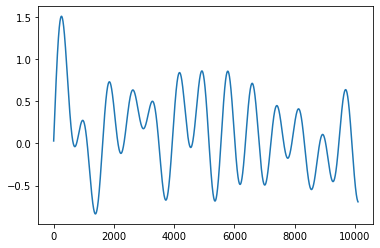

In [132]:
from scipy.integrate import solve_ivp
from scipy import stats
tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))
%matplotlib inline
extF= varying_extForce(tend+1, t_step, 0.6, 0.05)

In [133]:
u0=np.array([0, 0])
p = (1, tend, t_step, 2*extF)
start_time = timeit.default_timer()
sl2 = solve_ivp (nonSDMS_nonF_fun_LP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

13.24149726901669


In [134]:
u0=np.array([0, 0])
p = (1, tend, t_step, 2*extF)
start_time = timeit.default_timer()
slh = solve_ivp (nonSDMS_nonF_fun_HP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

23.880016913055442


<IPython.core.display.Javascript object>


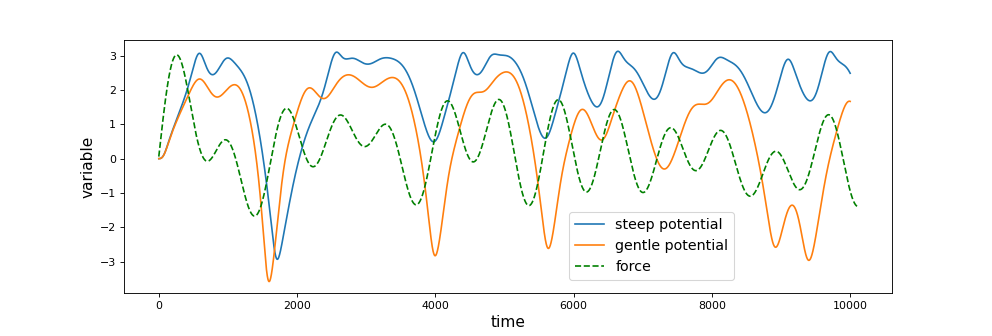

In [151]:
%matplotlib notebook
plt.plot(slh.y[0], label = 'steep potential')
plt.plot(sl2.y[0], label = 'gentle potential')
plt.plot(2*extF, '--', color = 'green',label = 'force')
plt.legend(loc=(0.58, 0.051), fontsize=13)
plt.xlabel("time", fontsize=14); plt.ylabel("variable", fontsize=14)
plt.show()

In [53]:
for i in np.arange(1000):

    extF= varying_extForce(tend+0.01, t_step, 0.6, 0.05)
    extF1 = extF[:-1]

    u0=np.array([0, 0])
    p = (1, tend, t_step, extF)
    start_time = timeit.default_timer()
    
    slL = solve_ivp (nonSDMS_nonF_fun_LP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    u0=np.array([0, 0])
    p = (1, tend, t_step, extF)
    start_time = timeit.default_timer()
    slH = solve_ivp (nonSDMS_nonF_fun_HP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    id='{0:04}'.format(i)
    sdms_df = pd.DataFrame({'low': slL.y[0], 'high' : slH.y[0], 'force': extF1})
    fnm = "/home/karthik/jupyter_dir/SDMS/differential_potential_finfo/simu_" + id + ".csv"
    sdms_df.to_csv(fnm)
    print(i)


11.021426169987535
22.695640650985297
0
10.76789899400319
19.261723636998795
1
10.734188982984051
21.11469454600592
2
11.470349466981133
18.940760727011366
3
11.85364337899955
21.451014187012333
4
11.456215835001785
21.493434600008186
5
8.888845742010744
18.95250191199011
6
11.735903792985482
21.83752426900901
7
10.402995982993161
20.706823926011566
8
9.771236783999484
19.456045856990386
9
10.403083968005376
21.697917390003568
10
11.106066495005507
20.803651874011848
11
10.401755942992168
19.76098724201438
12
9.920815708988812
19.00361953600077
13
10.836734416981926
20.817726167995716
14
9.13543568100431
19.29192063899245
15
9.545218707993627
20.25502334299381
16
10.465133719000733
21.743619904009392
17
10.522892055014381
19.742411137005547
18
10.992207304982003
20.37876455701189
19
11.482556207978632
21.520312181004556
20
11.333348404994467
22.45457159698708
21
11.11726039700443
20.416280269011622
22
8.988442891015438
18.81727459098329
23
10.892134091001935
19.105578663991764
24
10.10

17.705771660985192
202
10.774834170006216
19.97282357700169
203
11.105954343976919
20.551376212009927
204
10.568001313979039
21.161309906980023
205
10.140031813993119
20.080734104994917
206
11.009636592993047
21.253586405015085
207
11.105948059004731
18.46688891100348
208
10.612390302005224
18.57454968499951
209
9.588379384978907
20.99580500400043
210
10.130655854998622
21.631174837006256
211
9.54528113498236
19.290648708003573
212
12.568093162000878
22.508936464000726
213
8.67552429297939
19.301407589984592
214
10.26767189000384
22.088503331993707
215
9.605597201007186
20.237219407019438
216
12.132241187995533
19.09794666597736
217
8.543556193995755
18.907125952013303
218
6.413669315981679
13.74372348698671
219
10.875383805017918
19.306592144013848
220
10.982373374019517
21.42485293900245
221
10.514666164992377
22.254339412000263
222
12.283554783003638
23.04195050400449
223
10.060141689988086
20.016811188979773
224
11.85763583399239
22.754780068004038
225
9.456691622996004
20.65037389

11.030419721006183
22.648380221013213
402
11.282738120004069
19.622296515997732
403
10.331741242000135
22.402276328997687
404
10.468974874005653
19.69417603398324
405
9.048095875012223
19.99145864599268
406
10.353327599004842
19.754366709006717
407
9.482042490999447
18.679349842015654
408
12.191083947982406
21.28071431198623
409
9.301360504992772
18.6061616409861
410
9.752335825003684
16.844020133983577
411
10.188139511010377
19.921788013976766
412
9.995270123006776
20.539750130992616
413
10.567410689982353
20.757654933986487
414
10.530659232987091
23.030067915999098
415
10.939090295985807
20.449260043009417
416
8.677079326997045
18.490277553006308
417
10.349261794995982
20.29275108699221
418
11.918469538999489
24.32617663498968
419
9.648892325989436
19.85432877999847
420
9.556810368987499
21.330529372993624
421
9.970207912992919
18.53254631400341
422
11.434472991997609
20.86580634501297
423
11.53725724000833
18.10517927299952
424
9.754599849984515
18.841162993980106
425
10.64129502998

18.23602502999711
601
11.250076249998529
22.516710542025976
602
8.401440159010235
17.792767517006723
603
9.986276793002617
19.059728602005634
604
9.562231516989414
22.933802073006518
605
9.709455086995149
20.341084502986632
606
10.584896646993002
20.873947590996977
607
12.152167682012077
23.427385867020348
608
10.563938813982531
19.8131671170122
609
10.46015095000621
21.096766319999006
610
11.014266432001023
24.652151589019923
611
10.025867474003462
20.206459294015076
612
10.60942289599916
20.285748406982748
613
12.987878896004986
19.001819388999138
614
10.948543349019019
21.814509335992625
615
10.499718567996752
20.919467305997387
616
12.197538328997325
19.844290643988643
617
10.435108939011116
21.354539013002068
618
10.180913460004376
19.869833781995112
619
11.636264578002738
18.77255295898067
620
9.165248216013424
19.361573383997893
621
10.087905116000911
19.520046179997735
622
11.824891727999784
17.21276547299931
623
10.295613124006195
21.200909949024208
624
8.900875327992253
18.21

19.327225048007676
801
8.986596679023933
21.45034949798719
802
9.779333064012462
19.204467550996924
803
9.08605952898506
18.88787649499136
804
10.83922879700549
22.323897572001442
805
11.233556318999035
17.205585673014866
806
10.389661534980405
19.814578062010696
807
10.180111872003181
21.302203484025085
808
10.54881376598496
20.584992039977806
809
13.143804348976118
18.81694157398306
810
10.881474359019194
20.727275343000656
811
8.743561379989842
18.921042609988945
812
10.053509141987888
23.83201966100023
813
10.262901116977446
17.68988467301824
814
11.14183554999181
20.800668938987656
815
10.807071090006502
20.177859782008454
816
9.63942203600891
23.433038988994667
817
10.933744340989506
20.572326117020566
818
10.463391147000948
20.381557793007232
819
10.530432331986958
21.28596734200255
820
9.18813949698233
23.34572637200472
821
9.943009290000191
19.585636335017625
822
10.412837123003555
19.257571293012006
823
9.472272961982526
19.661308253009338
824
13.304973237012746
20.6035873889

In [2]:
import import_ipynb
%run /home/karthik/jupyter_dir/trophic_temp/trophic_temp/IRI_calc.ipynb

In [48]:
RRts2 = resilience_calc_func(slh.y[0])

[271.  nan 422.  nan  nan 232. 407.  nan 429.  nan  nan  nan 659.  nan
 765.  nan  nan 434. 722.  nan 812.  nan  nan  nan]
[232. 271. 407. 422. 429. 434. 659. 722. 765. 812.]


In [49]:
RRts1 = resilience_calc_func(sl2.y[0])
RRts2 = resilience_calc_func(slh.y[0])
RRts = (np.vstack((RRts1, RRts2)))
np.transpose(RRts)

from scipy import stats

retrt = stats.zscore(RRts, axis=0)
retrt1 = np.apply_along_axis(np.mean, 1, retrt)
1/np.exp(retrt1)

[ nan 247. 431.  nan  nan 341.  nan 438.  nan  nan  nan  nan 787. 857.
  nan  nan 683.  nan 958.  nan  nan  nan]
[247. 341. 431. 438. 683. 787. 857. 958.]
[271.  nan 422.  nan  nan 232. 407.  nan 429.  nan  nan  nan 659.  nan
 765.  nan  nan 434. 722.  nan 812.  nan  nan  nan]
[232. 271. 407. 422. 429. 434. 659. 722. 765. 812.]


array([0.36787944, 2.71828183])

In [38]:
RRts = (np.vstack((RRts1, RRts2)))
np.transpose(RRts)

array([[2.44191332e-03, 1.67273107e-03],
       [2.28098748e+00, 1.87874206e+00],
       [9.95777778e+02, 7.01214286e+02],
       [8.88888889e-01, 9.64285714e-01],
       [1.24958863e-03, 1.30482366e-03],
       [4.95413099e-01, 1.25031669e-01],
       [1.26561035e+03, 6.08033188e+02]])

In [38]:
from scipy import stats

retrt = stats.zscore(RRts, axis=0)
retrt1 = np.apply_along_axis(np.mean, 1, retrt)
retrt1

array([ 0.42857143, -0.42857143])

In [1]:
import os
fls1 = os.listdir('differential_potential/')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

1000

In [4]:
beta_Frrts =np.zeros([1,7])

for i in np.arange(len(fls)):
    
    df0 = pd.read_csv('differential_potential/' + fls[i])
    df0 = df0.rename(columns = {'Unnamed: 0':'id'})
    
    df = df0.iloc[500:,:] 
    
    lP = resilience_calc_func(np.array(df.low))
    hP = resilience_calc_func(np.array(df.high))
    
    rrts0 = np.vstack((lP, hP))
    beta_Frrts = np.vstack((beta_Frrts, rrts0))

    print(i)

[ nan  nan  nan  nan 401.  nan  nan 415.  nan 667. 109.  nan  nan  nan
  nan  nan 651.  nan  nan  nan  nan  nan  nan  nan]
[109. 401. 415. 651. 667.]
[ nan  nan  nan 367.  nan 482. 307. 169. 368. 187.  96. 125.  nan  nan
  nan 710.  nan 569. 670. 292. 767. 865. 577.  nan]
[ 96. 125. 169. 187. 292. 307. 367. 368. 482. 569. 577. 670. 710. 767.
 865.]
0
[ nan  nan 433. 318.  nan 802.  nan 916. 891.  nan  nan  nan  nan 667.
  nan  nan  nan  nan  nan  nan  nan  nan]
[318. 433. 667. 802. 891. 916.]
[  nan   nan  195.  340.  103.   nan  414.  601.  116.   nan   nan  448.
   nan   nan  655.  902.  476.   nan  685. 1325.  813.   nan   nan  497.]
[ 103.  116.  195.  340.  414.  448.  476.  497.  601.  655.  685.  813.
  902. 1325.]
1
[ nan  nan  nan  nan  nan 252.  nan 712.  nan  nan 517.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan 763.]
[252. 517. 712. 763.]
[ 59.  nan  nan  nan 422. 513. 103. 104. 254. 381.  nan 349.  nan 256.
  nan 280.  nan  nan  nan 805. 818. 856. 388. 787. 523.  nan

[ 20. 277.  nan 227. 392. 215.  nan  nan 229. 428.  nan 240.  nan 429.
 786.  nan 300. 474. 764.  nan  nan 735. 673.  nan 676.  nan]
[ 20. 215. 227. 229. 240. 277. 300. 392. 428. 429. 474. 673. 676. 735.
 764. 786.]
21
[  nan   nan   nan   nan  360.   nan  302.  639.  266.   nan   nan   nan
   nan  905.   nan   nan   nan 1370.]
[ 266.  302.  360.  639.  905. 1370.]
[  nan   nan   nan   nan  434.  458.   nan  301.  318.  356.   88.   nan
  228.  131.   nan   nan   nan   nan  484.  615.   nan  721.  473.  766.
  438.   nan 1082.  199.]
[  88.  131.  199.  228.  301.  318.  356.  434.  438.  458.  473.  484.
  615.  721.  766. 1082.]
22
[  nan   nan   nan  388.   nan   nan 1013.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 388. 1013.]
[ 79.  nan  nan 311. 330.  nan 344. 192. 302.  nan 376.  nan 322. 420.
  nan  nan 551. 875.  nan  nan  nan 877.  nan 714.  nan 566.]
[ 79. 192. 302. 311. 322. 330. 344. 376. 420. 551. 566. 714. 875. 877.]
23
[  nan   nan  237.  301. 

[ nan 290. 172.  nan  nan  nan 333. 186. 249.  nan 616.  nan 758. 559.
  nan  nan  nan 722. 447. 448.  nan  nan]
[172. 186. 249. 290. 333. 447. 448. 559. 616. 722. 758.]
[  nan   nan  232.  164.   nan   nan   nan  290.  168.  259.  325.  599.
   nan   nan  698.  643.   nan   nan   nan  695.  545.  544.  542. 1354.]
[ 164.  168.  232.  259.  290.  325.  542.  544.  545.  599.  643.  695.
  698. 1354.]
44
[ nan 441.  nan  nan 600. 450.  nan 776.  nan  nan  nan 607.  nan  nan
 751. 833.  nan  nan  nan  nan]
[441. 450. 600. 607. 751. 776. 833.]
[ nan 305. 373. 304.  nan 354. 303.  nan 388.  nan 152. 688.  65.  nan
 374. 725. 541.  nan 855. 811.  nan 686.  nan  nan  nan  nan]
[ 65. 152. 303. 304. 305. 354. 373. 374. 388. 541. 686. 688. 725. 811.
 855.]
45
[  nan  933.  239.   nan   nan  357.  783.   nan  455.   nan 1348.  621.
   nan   nan   nan   nan   nan  855.]
[ 239.  357.  455.  621.  783.  855.  933. 1348.]
[115.  nan 193. 138.  nan 375. 388. 301.  93.  nan 321. 213.  nan 793.
 753.  

[ nan  nan 278.  nan 426. 505. 763.  nan 298.  nan  nan 903.  nan 803.
  nan  nan  nan 977.]
[278. 298. 426. 505. 763. 803. 903. 977.]
[  nan   nan  380.   nan   nan   nan   nan   nan   nan   nan   nan  411.
   nan   nan   nan 1078.   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan]
[ 380.  411. 1078.]
65
[ nan  nan  nan  nan 359.  nan  nan  nan  nan  nan 366.  nan  nan  nan
  nan  nan  nan  nan  nan 554.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[359. 366. 554.]
[107.  38. 149. 374. 195. 206. 202. 322. 169. 150. 309. 130.  nan 304.
 323. 331. 513. 497. 617. 416. 539. 595. 528. 310. 769. 514.  nan 330.]
[ 38. 107. 130. 149. 150. 169. 195. 202. 206. 304. 309. 310. 322. 323.
 330. 331. 374. 416. 497. 513. 514. 528. 539. 595. 617. 769.]
66
[ nan  nan 428.  nan  nan  nan  nan 456.  67. 175.  nan  nan  nan 789.
  nan  nan  nan  nan 788. 682.  nan  nan]
[ 67. 175. 428. 456. 682. 788. 789.]
[ nan  nan  nan 294. 439.  nan  nan 380. 334. 617. 214.  89.  nan  nan
  nan 749. 

[ nan  nan 820.  nan  nan  nan  nan  nan 755.  52.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 52. 755. 820.]
85
[  nan   nan   nan  254.   nan  746.  122.  333.   nan  561.  151.   nan
   nan   nan   nan   nan   nan   nan  312.  597.   nan  706. 1087.   nan]
[ 122.  151.  254.  312.  333.  561.  597.  706.  746. 1087.]
[ nan 278. 278. 150. 150. 298. 180. 327.  nan 268. 115. 381.  nan  nan
 555. 510. 743. 297. 750. 576. 724.  nan 691. 608. 553.  nan]
[115. 150. 150. 180. 268. 278. 278. 297. 298. 327. 381. 510. 553. 555.
 576. 608. 691. 724. 743. 750.]
86
[  nan  400.  244.   nan  394.   nan  385.  464.  350.   nan  335.   nan
   nan   nan   nan  447.   nan   nan   nan 1422.   nan  974.]
[ 244.  335.  350.  385.  394.  400.  447.  464.  974. 1422.]
[108. 181. 374. 487. 220.  nan 344. 124.  nan 279.  nan 273. 369. 310.
  nan  nan 543. 585.  nan 803. 565.  nan 943.  nan 603. 840.]
[108. 124. 181. 220. 273. 279. 310. 344. 369. 374. 487. 543

[ 188.   nan   nan  309.  264.   nan 1118.   98.   nan  577.   nan   nan
  456.   nan   nan  425.   nan   nan 1119.  297.   nan 1047.   nan   nan]
[  98.  188.  264.  297.  309.  425.  456.  577. 1047. 1118. 1119.]
[275. 149. 257. 185. 320. 124. 399.  nan 327.  nan 435. 356. 416.  nan
 504. 527. 562. 912. 265. 727.  nan 657.  nan 921. 733. 658.]
[124. 149. 185. 257. 265. 275. 320. 327. 356. 399. 416. 435. 504. 527.
 562. 657. 658. 727. 733. 912. 921.]
107
[ nan  nan  nan  nan  nan 348.  nan 775.  nan 285.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[285. 348. 775.]
[  nan  318.   nan  388.  529.  127.   nan  121.  316.  398.  129.  149.
   nan  553.   nan 1013.  636.  803.   nan  641.  617.  684.  704.  461.]
[ 121.  127.  129.  149.  316.  318.  388.  398.  461.  529.  553.  617.
  636.  641.  684.  704.  803. 1013.]
108
[ nan 243. 587.  nan  nan  nan  nan 212. 690. 105. 307. 145.  nan  nan
  nan  nan  nan  nan  nan  nan  nan 403. 552.  nan]
[105. 145. 212. 243. 307.

[ 458.   nan  286.   nan  433.   nan   nan  353.  147. 1429.   nan  714.
   nan  573.   nan   nan  734.  422.]
[ 147.  286.  353.  422.  433.  458.  573.  714.  734. 1429.]
[  nan  143.   nan   nan  315.   nan  472.   nan   nan   nan  391.  206.
   nan   nan 1149.   nan   nan  645.   nan  553.   nan   nan   nan  662.
  478.   nan]
[ 143.  206.  315.  391.  472.  478.  553.  645.  662. 1149.]
129
[ 418.   nan   nan   nan  377.  181.   nan  269.   nan   nan  321.  667.
   nan   nan   nan  672.  409.   nan 1842.   nan   nan  412.]
[ 181.  269.  321.  377.  409.  412.  418.  667.  672. 1842.]
[ nan 108.  nan  nan  nan 289. 110.  nan 198. 132.  nan 263. 286. 186.
  nan 457.  nan  nan  nan 695. 518.  nan 823. 222.  nan 509. 585.  nan]
[108. 110. 132. 186. 198. 222. 263. 286. 289. 457. 509. 518. 585. 695.
 823.]
130
[ 190.   nan  282.  327.  209.  132.   nan   nan  514.   nan 1179. 1211.
 1050.  618.   nan   nan]
[ 132.  190.  209.  282.  327.  514.  618. 1050. 1179. 1211.]
[ 92.  nan  nan 29

[  38.  314.   nan  368.  383.   nan  418.  389.  357.   nan  513.   nan
  419.  278.  665.   nan  775.  661.   nan  636.  650. 1244.   nan  695.
   nan  586.]
[  38.  278.  314.  357.  368.  383.  389.  418.  419.  513.  586.  636.
  650.  661.  665.  695.  775. 1244.]
149
[  nan  392.   nan   nan  233.   nan  316.  490.  289.   nan  828.   nan
   nan 1078.   nan  699.  812.   nan]
[ 233.  289.  316.  392.  490.  699.  812.  828. 1078.]
[112.  nan 371.  nan  nan 252. 165. 381. 333. 566. 294. 217.  nan 765.
  nan  nan  nan  nan 425. 684. 916. 849.]
[112. 165. 217. 252. 294. 333. 371. 381. 425. 566. 684. 765. 849. 916.]
150
[572.  nan  nan  nan  nan  nan  nan 309.  nan  nan 967. 299. 657.  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan 659.]
[299. 309. 572. 657. 659. 967.]
[166. 456.  nan 389. 171. 429.  nan 271. 147.  95. 115.  nan 315.  nan
 608. 660.  nan 652. 384. 602.  nan 838. 342. 745. 690.  nan 710.  nan]
[ 95. 115. 147. 166. 171. 271. 315. 342. 384. 389. 429. 456. 602. 608.


[ nan  99. 164. 206. 102. 624. 220.  nan 243.  nan 303. 102.  nan 478.
 610. 657. 451. 882. 757.  nan 606.  nan 692. 553.]
[ 99. 102. 102. 164. 206. 220. 243. 303. 451. 478. 553. 606. 610. 624.
 657. 692. 757. 882.]
170
[  nan  382.   nan  372.  438.   83.   nan  948.   nan 1490.   nan  912.
  949. 1018.   nan   nan]
[  83.  372.  382.  438.  912.  948.  949. 1018. 1490.]
[ nan 190.  nan  nan 151. 238. 348. 144.  nan  nan 462.  nan 140.  nan
 757.  nan  nan 681. 371. 815. 730.  nan  nan 913.  nan  nan]
[140. 144. 151. 190. 238. 348. 371. 462. 681. 730. 757. 815. 913.]
171
[ 178.   nan  473.   58.  281.  420.   nan  341.   nan   nan  475.   nan
 1552.   nan   nan  712.   nan 1335.   nan   nan]
[  58.  178.  281.  341.  420.  473.  475.  712. 1335. 1552.]
[  73.  453.  378.   nan  165.  122.  405.  162.  319.  146.  403.   nan
  352.  480. 1063.   nan  679.  517.  808.  446.  850.  437.  607.   nan]
[  73.  122.  146.  162.  165.  319.  352.  378.  403.  405.  437.  446.
  453.  480.  51

[ 318.   nan  851.  809.   nan   nan  386.   nan   nan   nan   nan   nan
 1391.   nan   nan  812.   nan   nan]
[ 318.  386.  809.  812.  851. 1391.]
[ nan 148. 141. 158.  nan 499. 497.  nan 272.  nan 178. 104. 413.  87.
  nan 636. 506. 714.  nan  nan  nan  nan 601.  nan 673. 369. 710. 406.]
[ 87. 104. 141. 148. 158. 178. 272. 369. 406. 413. 497. 499. 506. 601.
 636. 673. 710. 714.]
191
[240.  nan 333.  nan 298. 351. 160. 227.  51. 165. 204. 854.  nan 609.
  nan 529. 749. 622. 802. 685. 503.  nan]
[ 51. 160. 165. 204. 227. 240. 298. 333. 351. 503. 529. 609. 622. 685.
 749. 802. 854.]
[ nan  71.  nan  nan 333.  nan 335. 417. 260. 261. 122. 309. 284.  nan
 530.  nan  nan 586.  nan 547. 704. 648. 700. 645. 599.  nan]
[ 71. 122. 260. 261. 284. 309. 333. 335. 417. 530. 547. 586. 599. 645.
 648. 700. 704.]
192
[ nan  nan  nan  nan  nan  nan  nan 472.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[472.]
[  nan   nan   nan   nan   nan   nan   nan 1013.  522.   nan  407

[132.  nan 287.  nan  nan  nan  nan 303. 227.  nan 246. 722.  53.  nan
 407.  nan 617.  nan  nan  nan  nan 633. 532.  nan  nan  nan  nan  nan]
[ 53. 132. 227. 246. 287. 303. 407. 532. 617. 633. 722.]
[173.  nan  nan  nan  nan  nan  nan  nan  nan  nan 384. 174.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 753.  nan  nan  nan]
[173. 174. 384. 753.]
212
[  nan   nan  450.   nan   nan   nan   nan   nan  337.   nan   nan   nan
   nan 1292.   nan   nan   nan   nan   nan   nan   nan   nan]
[ 337.  450. 1292.]
[235. 235. 392.  nan 206. 297. 275. 168.  nan 196. 205.  nan  nan 207.
  nan 480. 927.  nan 402. 587. 644. 600.  nan 722. 779.  nan  nan 486.]
[168. 196. 205. 206. 207. 235. 235. 275. 297. 392. 402. 480. 486. 587.
 600. 644. 722. 779. 927.]
213
[ nan  nan  nan  nan  nan 562.  nan  nan  nan 773.  95.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[ 95. 562. 773.]
[ nan 280. 447.  nan  nan  nan 298. 197. 261. 282.  97. 103.  nan  nan
 339. 579.  nan  nan  nan 764.

[ 495.  314.   nan  369.  151.  693.   nan  294.  216.  231.   nan  701.
 1186.   nan  556.   nan   nan   nan  607.  653.  405.   nan]
[ 151.  216.  231.  294.  314.  369.  405.  495.  556.  607.  653.  693.
  701. 1186.]
[134. 110. 307.  57.  nan 362. 158.  81.  nan  nan 305. 263. 273.  nan
 196. 348. 821. 345.  nan 600. 740. 649.  nan  nan 623. 664. 521.  nan]
[ 57.  81. 110. 134. 158. 196. 263. 273. 305. 307. 345. 348. 362. 521.
 600. 623. 649. 664. 740. 821.]
235
[  nan   nan   nan   nan   nan  231.   nan 1245.  182.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan  520.   nan   nan   nan]
[ 182.  231.  520. 1245.]
[  nan   nan   nan   nan  189.  173.  430.   nan  325.  451.   nan  213.
   nan   nan   nan   nan   nan  473. 1223.  614.   nan  762.  652.   nan
  542.   nan]
[ 173.  189.  213.  325.  430.  451.  473.  542.  614.  652.  762. 1223.]
236
[ 645.   nan  312.  527.   nan  787.   nan   nan   nan  845.   nan 1424.
   nan   nan   nan   nan   nan   nan]
[ 312.

[ 416.   nan   nan   nan  422.  299. 1536.   nan  681.   nan   nan   nan
 1121.   nan   nan   nan]
[ 299.  416.  422.  681. 1121. 1536.]
[  nan   nan   nan   nan   nan  788.   nan   nan   nan 1461.   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 788. 1461.]
257
[  nan  286.   nan   nan   nan  271.  460.  189. 1695.   nan   nan   nan
   nan  527.   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 189.  271.  286.  460.  527. 1695.]
[203.  nan  nan 330. 279. 107. 293.  nan 238.  nan 275. 292.  nan 598.
  nan  nan 516. 954. 251. 810.  nan 584.  nan 563. 588.  nan]
[107. 203. 238. 251. 275. 279. 292. 293. 330. 516. 563. 584. 588. 598.
 810. 954.]
258
[ 752.  947.  196.   nan  372.  111.   nan 1628. 1361.  491.   nan   nan
   nan   nan]
[ 111.  196.  372.  491.  752.  947. 1361. 1628.]
[  nan  365.   nan   nan  777.  173.  374.   nan  191.  184.   nan  240.
  382.   nan 1153.   nan   nan 1279.  661.  677.   nan  743.  564.   nan
  547.  577.]
[ 173.  

[ nan 441.  nan  nan 320.  nan  nan 810.  nan 280.  nan  nan  nan 523.
  nan  nan  nan  nan  nan  nan  nan 972.  nan  nan]
[280. 320. 441. 523. 810. 972.]
[277. 186. 318. 172. 341.  51.  nan 372. 173.  nan 205.  54.  nan 672.
 472. 564. 723. 696. 278.  nan 668. 728.  nan 506. 772.  nan]
[ 51.  54. 172. 173. 186. 205. 277. 278. 318. 341. 372. 472. 506. 564.
 668. 672. 696. 723. 728. 772.]
278
[  nan  349. 1003.   58.  119.   nan  790.   nan   nan   nan   nan   nan
  722.  462.   nan 1597.   nan   nan]
[  58.  119.  349.  462.  722.  790. 1003. 1597.]
[  nan  438.   nan  481.  453.   nan   nan  857.   nan   nan   nan  754.
   nan  726.  565.   nan   nan 2230.   nan   nan]
[ 438.  453.  481.  565.  726.  754.  857. 2230.]
279
[103.  nan  nan 270.  nan  nan 300. 295.  nan  nan  nan 258. 852. 205.
 502.  nan  nan 610.  nan  nan 711. 329.  nan  nan  nan  nan  nan  nan]
[103. 205. 258. 270. 295. 300. 329. 502. 610. 711. 852.]
[293. 425. 176. 232. 330. 357. 310. 196.  nan  nan  nan 219. 138. 3

[  nan   nan 1105. 1043.   nan   nan 1388.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan 1487.   nan   nan   nan   nan]
[1043. 1105. 1388. 1487.]
299
[ nan  nan  nan 310. 111. 882.  nan 399. 307. 298.  nan  nan  nan 971.
  nan  nan  nan 773. 468. 755.]
[111. 298. 307. 310. 399. 468. 755. 773. 882. 971.]
[  nan   nan   nan  425.   nan 1029.   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan]
[ 425. 1029.]
300
[  nan   nan   nan  431.   nan   nan  717.  158.   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan 1798.   nan   nan   nan]
[ 158.  431.  717. 1798.]
[ nan  nan  nan 251. 168.  nan 287. 112. 217.  nan  nan 411. 209. 161.
  nan  nan  nan 791. 491.  nan 881. 545. 679.  nan  nan 483. 620.  nan]
[112. 161. 168. 209. 217. 251. 287. 411. 483. 491. 545. 620. 679. 791.
 881.]
301
[ 99. 396. 263. 214.  nan  nan 293.  nan 439. 200. 318. 748. 856. 558.
  nan  nan 908.  nan 598.  nan]
[ 99. 200. 21

[ nan 365. 367. 380. 381. 213. 231. 508.  89. 312.  nan 825. 609. 896.
 807. 433. 890. 982. 746. 701.]
[ 89. 213. 231. 312. 365. 367. 380. 381. 433. 508. 609. 701. 746. 807.
 825. 890. 896. 982.]
321
[  nan   nan   nan   nan   nan  189.  227.   nan   nan   nan   nan   nan
 1677.   nan]
[ 189.  227. 1677.]
[  nan   nan  564.   nan   nan  603. 1162.   nan  392.   nan   nan  930.
   nan   nan   nan   nan   nan   nan]
[ 392.  564.  603.  930. 1162.]
322
[ 204.   nan  459. 1041.   nan   nan   nan   nan   nan  486.   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 204.  459.  486. 1041.]
[  76.   nan  435.  353.   nan  152.   nan  148.   nan  579.   nan  424.
  376.   nan  655. 1018.   nan  852.   nan  381.   nan  887.   nan  472.]
[  76.  148.  152.  353.  376.  381.  424.  435.  472.  579.  655.  852.
  887. 1018.]
323
[  nan   nan  386.   nan  309.   nan  740.   nan 1112.   nan   nan 1384.
   nan  769.   nan 1659.   nan 1148.]
[ 309.  386.  740.  769. 1112. 1148. 1384. 1659.]
[ 130.   n

[  nan   nan  843.   nan   nan  267. 1011.   nan   nan   nan   nan   nan
   nan 1240.   nan   nan   nan   nan   nan   nan   nan   nan]
[ 267.  843. 1011. 1240.]
[ 115.   nan  590.   nan  319.  286.  144.  473.   nan   nan  237.   nan
  354.  271.   nan 1191.   nan  659. 1065.   nan   nan   nan   nan  613.
   nan  543.]
[ 115.  144.  237.  271.  286.  319.  354.  473.  543.  590.  613.  659.
 1065. 1191.]
343
[  nan   nan   nan  303.   nan   nan   nan  236.   nan 1062.   nan   nan
   nan 1292.   nan   nan   nan   nan   nan   nan]
[ 236.  303. 1062. 1292.]
[  nan   nan  458.  385.   nan   nan   nan  470.  154.  257.   nan   nan
   nan   nan  755. 1555.   nan   nan   nan  571.  580.  603.   nan   nan]
[ 154.  257.  385.  458.  470.  571.  580.  603.  755. 1555.]
344
[  nan  280.  158.   nan  319.   nan   nan  269. 1008.  362.  189.   nan
  853.  408.   nan  636.   nan   nan   nan   nan  796.  504.]
[ 158.  189.  269.  280.  319.  362.  408.  504.  636.  796.  853. 1008.]
[ nan 298. 271. 1

[124.  nan 164. 139.  nan 295. 294.  nan 388. 223.  nan  nan 218. 572.
 212.  nan 727. 612.  nan 305. 764.  nan 734. 674.  nan  nan 538.  nan]
[124. 139. 164. 212. 218. 223. 294. 295. 305. 388. 538. 572. 612. 674.
 727. 734. 764.]
364
[ nan  nan  nan 420.  nan 610. 267.  nan 793. 280.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[267. 280. 420. 610. 793.]
[114.  nan 532. 168.  nan  nan 269. 316.  nan 281.  nan 314. 126.  nan
 184.  nan 957. 763.  nan  nan 501. 758.  nan 751.  nan 834. 554.  nan]
[114. 126. 168. 184. 269. 281. 314. 316. 501. 532. 554. 751. 758. 763.
 834. 957.]
365
[ nan  nan  nan  nan  nan 328. 283. 382.  nan 282.  nan  nan  nan  nan
  nan  nan 804.  nan  nan  nan 879.  nan]
[282. 283. 328. 382. 804. 879.]
[ 117.   nan  470.   nan  170.  319.   nan  253.   nan   88.  383.  301.
   nan   nan  202.   nan  735.   nan  381.  758.   nan 1030.   nan  472.
  429.  769.   nan   nan]
[  88.  117.  170.  202.  253.  301.  319.  381.  383.  429.  470.  472.
  735

[  nan   nan  463.   nan  427.  114.   nan 1245.   nan   nan   nan 1071.
   nan 1199.   nan   nan   nan   nan]
[ 114.  427.  463. 1071. 1199. 1245.]
[  nan   nan  384.  165.  249.   nan  199.   nan  307.   nan   nan   nan
   nan 1142.  254.  810.   nan  729.   nan  920.   nan   nan]
[ 165.  199.  249.  254.  307.  384.  729.  810.  920. 1142.]
386
[ nan  nan 360. 751.  nan  nan 374. 675. 138. 272.  nan  nan  nan  nan
  nan  nan  nan  nan 595. 417.]
[138. 272. 360. 374. 417. 595. 675. 751.]
[ 102.   nan  305.   66.  152.   nan  373.  384.   nan  371.  380.  329.
  125.   nan 1088.  566.  324.   nan  649.  810.   nan  634.  769.  710.]
[  66.  102.  125.  152.  305.  324.  329.  371.  373.  380.  384.  566.
  634.  649.  710.  769.  810. 1088.]
387
[  nan   nan   nan  308.  260.   nan  536.  272.   nan   nan   nan 1283.
  710.   nan 1529. 1057.]
[ 260.  272.  308.  536.  710. 1057. 1283. 1529.]
[ 167.  101.   nan  424.  188.  362.   nan  231.   nan   nan  439.  466.
  280.  273.   nan  5

[491. 152. 151. 223.  99. 233. 234.  nan  nan 315.  nan 282.  nan 655.
 515. 869. 481. 386. 728.  nan  nan 700.  nan 624.]
[ 99. 151. 152. 223. 233. 234. 282. 315. 386. 481. 491. 515. 624. 655.
 700. 728. 869.]
[274. 264. 356. 198. 291. 291.  nan  nan 325.  nan 283. 682. 624. 806.
 625. 518. 697.  nan  nan 691.  nan 627.]
[198. 264. 274. 283. 291. 291. 325. 356. 518. 624. 625. 627. 682. 691.
 697. 806.]
408
[ nan  nan  nan  nan  nan  nan  nan 358.  nan  nan  nan  nan 782.  88.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 88. 358. 782.]
[341.  nan 360.  nan 205. 303. 291. 105. 310. 160. 185. 277. 281. 566.
  nan 517.  nan 473. 568. 853. 380. 501. 612. 592. 573. 653.]
[105. 160. 185. 205. 277. 281. 291. 303. 310. 341. 360. 380. 473. 501.
 517. 566. 568. 573. 592. 612. 653. 853.]
409
[ nan  nan  nan  nan  nan 747.  nan 686.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[686. 747.]
[122. 523.  nan 342. 122. 253. 369. 710. 180.  nan 198. 259. 336. 189.
 83

[ nan 214. 349. 132. 237.  70. 215.  nan  nan  nan 275.  nan 316. 280.
  nan 424. 610. 415. 768. 534. 720.  nan  nan  nan 671.  nan  nan  nan]
[ 70. 132. 214. 215. 237. 275. 280. 316. 349. 415. 424. 534. 610. 671.
 720. 768.]
429
[ nan  nan  nan  nan  nan 423.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[423.]
[ 118.  119.   nan   nan  401.  329.  296.   nan   54.  348.  447.  260.
  391.   nan   nan  611.  486.  907.   nan 1091.  349.   nan]
[  54.  118.  119.  260.  296.  329.  348.  349.  391.  401.  447.  486.
  611.  907. 1091.]
430
[  nan   nan   nan  344.   nan  823.   nan 1224.   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[ 344.  823. 1224.]
[ nan  nan  nan  nan 899.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[899.]
431
[  nan  410.  685.  637.  605.   67.  545.   nan  492.   nan   nan   nan
 1426.  945.  971.  615.   nan  617.]
[  67.  410.  492.  545.  605.  615.  617.  637.  

[  nan   nan  346.  314.   nan  192.   nan   nan   nan   nan   nan  838.
 2033.   nan  850.   nan   nan   nan]
[ 192.  314.  346.  838.  850. 2033.]
[  nan   nan  232.   nan  293.  196.   nan  754.  195.  106.  282.  380.
   nan   nan   nan  662.   nan  764.  565.   nan 1044. 1063.  257.  485.
  635.   nan]
[ 106.  195.  196.  232.  257.  282.  293.  380.  485.  565.  635.  662.
  754.  764. 1044. 1063.]
452
[399. 175.  nan 236.  nan  nan 227. 190. 207. 181. 131.  79. 506. 607.
  nan 631.  nan  nan 703. 303. 557. 754. 625.  nan]
[ 79. 131. 175. 181. 190. 207. 227. 236. 303. 399. 506. 557. 607. 625.
 631. 703. 754.]
[ nan 321. 176. 710. 249.  nan  nan 202. 182. 231. 265. 265. 127.  nan
 491. 586. 808. 617.  nan  nan 623. 421. 568. 702. 667. 685.]
[127. 176. 182. 202. 231. 249. 265. 265. 321. 421. 491. 568. 586. 617.
 623. 667. 685. 702. 710. 808.]
453
[ nan  nan  nan  nan 229. 203.  nan  nan  nan 282.  nan  nan  nan  nan
  nan  nan  nan  nan  nan 741.]
[203. 229. 282. 741.]
[  nan   nan

[ nan  nan  nan 469. 434. 878.  nan  nan 425.  nan  nan  nan  nan 756.
  nan  nan  nan  nan  nan  nan]
[425. 434. 469. 756. 878.]
[210. 358. 351.  nan 289.  nan 241. 367.  nan 274. 252.  51. 202. 487.
 620. 803.  nan 871.  nan 610. 595.  nan 620. 788. 435.  nan]
[ 51. 202. 210. 241. 252. 274. 289. 351. 358. 367. 435. 487. 595. 610.
 620. 620. 788. 803. 871.]
475
[  nan   nan  969.   nan   nan 1296.   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan]
[ 969. 1296.]
[ 110.   nan  355.   nan  692.  177.   89.   nan  235.  463.  463.  279.
   nan  593.   nan 1408.  671. 1203.   nan  495.  825.  920.]
[  89.  110.  177.  235.  279.  355.  463.  463.  495.  593.  671.  692.
  825.  920. 1203. 1408.]
476
[  nan  257.  326.  829.  190.   nan   nan  449.   nan  391.   nan  574.
  520. 2045.  538.   nan   nan  825.   nan  719.]
[ 190.  257.  326.  391.  449.  520.  538.  574.  719.  825.  829. 2045.]
[  94.  140.  308.  826.   nan  393.   nan  303.  234.  355.   43.  334.
  278.  600.  

[ nan  nan  nan  nan  nan  nan 294.  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[294.]
[103.  nan 694.  nan 333. 448. 340.  36. 669. 166. 175. 299. 171. 228.
  nan 841.  nan 525. 637. 858.  nan  nan 517. 483. 817.  nan]
[ 36. 103. 166. 171. 175. 228. 299. 333. 340. 448. 483. 517. 525. 637.
 669. 694. 817. 841. 858.]
497
[  nan  551.  282.  200.   nan  419.   nan   nan 1364. 2388.  324.   nan
  707.   nan]
[ 200.  282.  324.  419.  551.  707. 1364. 2388.]
[ 155.  122.  394.   nan  269.  279.  375.   nan  341.   nan  228.  230.
  200.  288. 1071.   nan  900.  990.  779.   nan  659.   nan  686.  509.]
[ 122.  155.  200.  228.  230.  269.  279.  288.  341.  375.  394.  509.
  659.  686.  779.  900.  990. 1071.]
498
[  nan   nan   nan   nan  203.  451. 1216.   nan   nan   nan   nan   nan
 1258.   nan   nan   nan]
[ 203.  451. 1216. 1258.]
[  nan   nan   nan   nan   nan   nan   nan  311.  209.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan 1709.

[  nan   nan  355.   nan  419.   nan  456.   nan   nan   nan 1055.   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 355.  419.  456. 1055.]
[ nan 249. 361. 166. 174. 322. 400. 278. 145. 196. 105. 301.  nan  nan
 433. 616. 685. 294. 562. 489. 742. 512. 854. 372. 604.  nan]
[105. 145. 166. 174. 196. 249. 278. 294. 301. 322. 361. 372. 400. 433.
 489. 512. 562. 604. 616. 685. 742. 854.]
519
[ nan 841. 946. 197.  92. 266.  nan  nan  nan  nan  nan 693. 774. 519.
  nan  nan]
[ 92. 197. 266. 519. 693. 774. 841. 946.]
[ nan  nan  nan  93. 197. 359. 244. 127.  nan 174.  nan  nan  nan 212.
  nan  nan  nan 696.  nan  nan 697. 673.  nan 527.  nan  nan  nan  nan]
[ 93. 127. 174. 197. 212. 244. 359. 527. 673. 696. 697.]
520
[  nan  590.  768.   nan  711.   nan   nan 1611. 1416.   nan 2693.   nan]
[ 590.  711.  768. 1416. 1611. 2693.]
[  nan   nan  346.   nan  763.   nan  453.   nan   nan  617.  274.   nan
   nan 1138.   nan 1524.   nan 1099.   nan   nan  762.  770.]
[ 274.  346. 

[ nan 190. 324.  nan 214.  nan  nan 249.  nan  nan 320. 146. 165. 242.
  nan  nan 574. 725.  nan 854.  nan  nan 651.  nan  nan 547. 600. 454.
 740.  nan]
[146. 165. 190. 214. 242. 249. 320. 324. 454. 547. 574. 600. 651. 725.
 740. 854.]
540
[  nan  291.  212.  469.   nan  341.  131.  263.   nan   nan  198.   nan
  597.  644. 1046.   nan  756.  584.  801.   nan   nan   nan]
[ 131.  198.  212.  263.  291.  341.  469.  584.  597.  644.  756.  801.
 1046.]
[285. 217. 274. 480. 458. 338. 138. 374.  nan  nan 411. 137.  nan 632.
 659.  nan  nan 595. 734. 617. 838.  nan  nan 608. 745.  nan]
[137. 138. 217. 274. 285. 338. 374. 411. 458. 480. 595. 608. 617. 632.
 659. 734. 745. 838.]
541
[ nan 370.  nan 276.  nan  nan 885.  nan  nan  nan  nan  nan 591.  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[276. 370. 591. 885.]
[ nan  nan 196.  nan  nan 168. 251. 174. 132. 227.  nan 269.  nan 308.
 114.  nan  nan 628.  nan  nan 532. 797. 505. 544. 758.  nan 443.  nan
 553. 551.]
[114. 132. 168. 174. 196

[  nan   nan   nan   nan  210.   nan   nan 1000.   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[ 210. 1000.]
[ nan  nan  nan  nan  nan 320. 122.  88.  98. 141.  nan  nan 335.  nan
  nan  nan  nan  nan 742. 990. 752. 579. 445.  nan  nan  nan]
[ 88.  98. 122. 141. 320. 335. 445. 579. 742. 752. 990.]
562
[ nan  nan 398.  nan  nan  nan 692.  nan 687. 553.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[398. 553. 687. 692.]
[ nan  nan  nan  nan  nan 645.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[645.]
563
[ nan 502. 677. 362. 724.  55.  nan 740.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[ 55. 362. 502. 677. 724. 740.]
[  nan  156.   nan  241.  144.  489.   nan   nan  425.   nan  258.  479.
   nan  406.   nan  477.   nan  920.  261. 1114.   nan   nan  639.   nan
   nan   nan   nan  963.]
[ 144.  156.  241.  258.  261.  406.  425.  477.  479.  489.  639.  920.
  963. 11

[ nan  nan  nan  nan 380.  nan  nan 742.  nan  nan 483.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[380. 483. 742.]
[ nan  nan 109. 266.  87. 563.  nan 207. 341. 138. 288.  nan 199.  nan
  nan 455. 861. 385. 914.  nan 387. 781. 333. 872.  nan  nan]
[ 87. 109. 138. 199. 207. 266. 288. 333. 341. 385. 387. 455. 563. 781.
 861. 872. 914.]
584
[274.  nan  nan  nan  nan  nan 469. 231.  nan 694. 248.  nan 352.  nan
  nan  nan  nan  nan 573.  nan  nan  nan 298.  nan]
[231. 248. 274. 298. 352. 469. 573. 694.]
[288.  nan  nan 226. 444. 269.  nan 240. 145. 150. 261. 510. 367. 366.
  nan  nan  nan 502. 608. 623.  nan 677. 715. 556.  nan  nan 776. 634.]
[145. 150. 226. 240. 261. 269. 288. 366. 367. 444. 502. 510. 556. 608.
 623. 634. 677. 715. 776.]
585
[  nan   nan  386.  130.   nan  479.  372.   nan   nan   nan   nan   nan
   nan 1013.  365.   nan  672.   nan   nan   nan   nan   nan]
[ 130.  365.  372.  386.  479.  672. 1013.]
[108. 453. 278. 234. 402. 342. 373. 182.  nan 367. 361. 

[  nan  257.  270.   nan  236.  403.  225.   nan  349.   nan  329.   nan
  457.  523.   nan   nan   nan 1062.   nan  730.   nan  748.]
[ 225.  236.  257.  270.  329.  349.  403.  457.  523.  730.  748. 1062.]
[  nan  170.  343.   nan  250.   nan  341.  183.   nan  391.  241.  384.
  446.   nan  434.  604.   nan 1111.   nan  716.  303.   nan  702.  374.
  719.   nan]
[ 170.  183.  241.  250.  303.  341.  343.  374.  384.  391.  434.  446.
  604.  702.  716.  719. 1111.]
605
[ nan  nan  nan  nan  nan 287.  nan  nan 300. 365.  nan  nan  nan  nan
  nan  nan 666.  nan  nan 756.  nan  nan]
[287. 300. 365. 666. 756.]
[ nan  nan 408. 393. 299. 133.  nan 374. 233. 241.  nan 223. 423. 217.
  nan  nan 532. 621. 542. 636.  nan 640. 474. 704.  nan  nan  nan  nan]
[133. 217. 223. 233. 241. 299. 374. 393. 408. 423. 474. 532. 542. 621.
 636. 640. 704.]
606
[571. 159.  nan 216. 265. 230. 118. 160. 276. 189. 165. 234. 325.  nan
 538.  nan 485. 578. 666. 546. 515. 527. 366. 610. 565. 643.]
[118. 159. 160

[  nan   nan  562. 1308.   nan   nan   nan  434.   nan   nan   nan   nan
   nan   nan   nan   nan 1171.   nan]
[ 434.  562. 1171. 1308.]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan 503.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[503.]
627
[  nan  536.  408.  820.   nan   nan 1018.   nan 1143. 1271.   nan   nan
   nan   nan]
[ 408.  536.  820. 1018. 1143. 1271.]
[ 123.   nan  363.  158.   nan   nan   nan  451.   nan  365.   nan  422.
   nan 1421.  751.   nan   nan   nan  943.   nan  647.   nan]
[ 123.  158.  363.  365.  422.  451.  647.  751.  943. 1421.]
628
[ 245.   nan  346. 1800.   nan   nan   nan  442.  414.   nan   nan   nan
   nan   nan   nan   nan]
[ 245.  346.  414.  442. 1800.]
[ 311.   nan   nan  259.  293.  179.  109.   nan   nan  325.   nan  255.
  331.  142.   nan   nan   nan  631. 1006.  216.  468.   nan   nan  684.
   nan  551.  826.  434.]
[ 109.  142.  179.  216.  255.  259.  293.  311.  325.  331.  434.  468.
  551.  631.  684.  826. 10

[135. 234. 199. 219. 314.  nan 257.  nan 306.  nan  nan 281.  nan 243.
 235. 588. 579. 571. 541. 616.  nan 615.  nan 779.  nan  nan 719.  nan
 592.  nan]
[135. 199. 219. 234. 235. 243. 257. 281. 306. 314. 541. 571. 579. 588.
 592. 615. 616. 719. 779.]
648
[  nan  489.  331.  415.   nan  451.   nan  343.   nan 1520. 1273. 1310.
   nan 1194.   nan  712.]
[ 331.  343.  415.  451.  489.  712. 1194. 1273. 1310. 1520.]
[  nan  257.  200.   nan  274.   nan  443.   nan   nan  322.   nan   nan
  185.   nan   nan  594.  250.   nan  784.   nan 1644.   nan   nan  826.
   nan   nan  507.   nan]
[ 185.  200.  250.  257.  274.  322.  443.  507.  594.  784.  826. 1644.]
649
[  nan  444.  347.   nan  679.  268.   nan  383.   nan   nan  976.  756.
   nan 2283.  510.   nan  851.   nan]
[ 268.  347.  383.  444.  510.  679.  756.  851.  976. 2283.]
[  nan  430.  279.   nan   nan  475.  157.   37.  175.   nan  330.  434.
   nan  930.  729.   nan   nan 1635.  318.  186.  583.   nan  804.  642.]
[  37.  157. 

[ nan  nan  nan 423.  nan 431.  nan  nan  nan 388.  nan  nan  nan  nan
  nan 779.  nan 576.  nan  nan  nan  nan  nan  nan]
[388. 423. 431. 576. 779.]
[ nan 190. 357. 270. 366. 134. 375. 170. 309.  nan  nan 312. 104. 127.
  nan 423. 642. 393. 762. 402. 726. 461. 620.  nan  nan 884. 463. 733.]
[104. 127. 134. 170. 190. 270. 309. 312. 357. 366. 375. 393. 402. 423.
 461. 463. 620. 642. 726. 733. 762. 884.]
670
[  nan   nan   nan  246.   nan  271.   nan   nan  436.   nan   nan   nan
  744.   nan 1074.   nan   nan   nan]
[ 246.  271.  436.  744. 1074.]
[125.  nan 415. 126. 277. 213.  nan 204. 416. 419. 133. 235.  nan 733.
 648. 536. 920.  nan 684. 575. 927. 440.]
[125. 126. 133. 204. 213. 235. 277. 415. 416. 419. 440. 536. 575. 648.
 684. 733. 920. 927.]
671
[  nan   nan  474. 1061.   nan   nan   nan  306.   nan   nan   nan   nan
   nan   nan   nan   nan   nan  659.   nan   nan]
[ 306.  474.  659. 1061.]
[  nan   nan  536.  620.   nan   nan   nan   nan   nan  282.  313.  414.
   nan   nan  6

[  nan   nan  358.  265.   nan   nan  396.   nan  308. 1098.   nan   nan
   nan  605.  605.   nan   nan  830.   nan   nan   nan   nan]
[ 265.  308.  358.  396.  605.  605.  830. 1098.]
[ nan 122. 284. 196. 123. 160. 335.  nan 485. 178.  nan 165.  nan  nan
 339. 686. 683. 526. 415. 803.  nan 721. 844.  nan 568.  nan]
[122. 123. 160. 165. 178. 196. 284. 335. 339. 415. 485. 526. 568. 683.
 686. 721. 803. 844.]
691
[  nan   nan   nan   nan  167.   nan 1417.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 167. 1417.]
[  nan  299.   nan   nan  795.   68.  145.   91.   nan  254.  393.  358.
   nan   nan  638.   nan   nan 1382.  767.  825.  729.   nan  388.  651.
  671.   nan]
[  68.   91.  145.  254.  299.  358.  388.  393.  638.  651.  671.  729.
  767.  795.  825. 1382.]
692
[ nan 269.  nan 851.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[269. 851.]
[  nan   nan  447. 1234.   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan 

[  nan  487.   nan  312.   nan  652.   nan  297.  647.   nan 1423.   nan
  691.   nan  843.   nan   nan   nan]
[ 297.  312.  487.  647.  652.  691.  843. 1423.]
[  nan  331.   nan   nan   nan  175.  354.  361.  373.  295.   99.   nan
   nan 1172.   nan   nan   nan  615.  523.  960.  594.  885.  289.   nan]
[  99.  175.  289.  295.  331.  354.  361.  373.  523.  594.  615.  885.
  960. 1172.]
712
[ 276.  303.   nan  523.  984.  366.   nan  465.  571.  673.   nan  606.
 1503. 1193.   nan   nan]
[ 276.  303.  366.  465.  523.  571.  606.  673.  984. 1193. 1503.]
[ nan  nan  nan  nan  nan  nan  nan 625.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[625.]
713
[ nan  nan  nan 337. 911. 401. 753.  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[337. 401. 753. 911.]
[ nan  nan 328. 348. 101. 137. 139. 383. 259. 254.  nan 312.  nan  nan
  nan  nan 628. 550. 679. 340. 628.  nan  nan 821.  nan 638.  nan  nan]
[101. 137. 139. 254. 259. 312. 328. 340. 348. 383. 5

[ nan  nan  nan  nan  nan  nan  nan  nan 410.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[410.]
[ nan 145. 373. 304. 407. 355.  86. 280. 203. 324.  nan 506. 142.  nan
 252.  nan  nan 697. 662. 524. 511. 522.  nan  nan  nan 551.]
[ 86. 142. 145. 203. 252. 280. 304. 324. 355. 373. 407. 506. 511. 522.
 524. 551. 662. 697.]
735
[ nan  nan  nan  nan  nan  nan  nan  nan 378.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[378.]
[  46.   nan   nan  357.  423.   nan   nan  167.  379.  140.   42.  247.
  341.  235.   nan   nan  615.  590.   nan   nan  558. 1051.  304.  441.
  784.  842.]
[  42.   46.  140.  167.  235.  247.  304.  341.  357.  379.  423.  441.
  558.  590.  615.  784.  842. 1051.]
736
[  nan   nan  409.  126.  778.   nan   nan  432.  340.   nan   nan 1017.
   nan   nan   nan   nan  992.   nan]
[ 126.  340.  409.  432.  778.  992. 1017.]
[  95.   nan   nan  287.  217.  132.   nan   nan   nan   nan  339.  196.
   nan   nan  351.   nan   

[ 128.  825.  182.   nan   nan   nan   nan  300.  131.   nan   nan   nan
  455.  375. 1259.  861.   nan   nan   nan   nan  959.  909.   nan   nan
   nan  609.]
[ 128.  131.  182.  300.  375.  455.  609.  825.  861.  909.  959. 1259.]
756
[  nan  395.   nan  653.  582.   nan  681.   nan  872.   nan   nan   nan
   nan   nan   nan   nan   nan 1444.]
[ 395.  582.  653.  681.  872. 1444.]
[ nan 162. 327.  70.  nan  nan 146. 219.  nan 406.  nan 123.  nan  nan
 248.  nan 439. 938. 344.  nan  nan 648. 734.  nan 679.  nan 762.  nan
  nan 276.]
[ 70. 123. 146. 162. 219. 248. 276. 327. 344. 406. 439. 648. 679. 734.
 762. 938.]
757
[  nan  757.   nan   nan  245.   nan  644.   nan   nan   nan  446.   nan
 1151.   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 245.  446.  644.  757. 1151.]
[ nan  nan  nan  nan  nan 460.  nan  nan 979.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[460. 979.]
758
[ 319.  222.  563.  121.  229.  280.   nan  226.  146.   nan  606.

[283. 237.  nan 484.  nan 323.  93.  nan  nan  nan  nan 581. 652.  nan
 712.  nan 845.  nan  nan  nan  nan  nan]
[ 93. 237. 283. 323. 484. 581. 652. 712. 845.]
[335. 233.  nan  nan  nan 260. 344. 220. 187. 332. 398.  nan  nan 254.
  nan 587.  nan  nan  nan 694. 658. 750. 565. 548. 596.  nan  nan  nan]
[187. 220. 233. 254. 260. 332. 335. 344. 398. 548. 565. 587. 596. 658.
 694. 750.]
778
[  nan  594.  341.   nan   nan  272.   nan   nan  882. 1085.   nan   nan
 1957.   nan]
[ 272.  341.  594.  882. 1085. 1957.]
[105.  nan 350. 353. 142.  nan  nan 508. 125. 100. 445.  nan 277.  nan
 846. 931. 271.  nan  nan 628. 966. 214. 516.  nan]
[100. 105. 125. 142. 214. 271. 277. 350. 353. 445. 508. 516. 628. 846.
 931. 966.]
779
[  nan  640.  375.   nan  359.  740.  762.  139.   nan  988.   nan   nan
   nan 1074. 1431.  625.]
[ 139.  359.  375.  625.  640.  740.  762.  988. 1074. 1431.]
[ 152.  151.   nan  437.  321.   nan  216.  693.   nan  656.  335.   nan
  223.  332.   nan  915. 1354.   nan  561

[ 180.  171.   nan   nan   nan  183.   nan  286.  170.  264.  215.  181.
  558.  567.   nan   nan   nan  739.   nan  382. 1013.  515.  436.  668.]
[ 170.  171.  180.  181.  183.  215.  264.  286.  382.  436.  515.  558.
  567.  668.  739. 1013.]
[302. 262.  nan 334.  nan 167.  nan 270. 181. 267. 306. 267. 243. 294.
 630. 611.  nan 459.  nan 640.  nan 440.  nan  nan 559. 500. 638.  nan]
[167. 181. 243. 262. 267. 267. 270. 294. 302. 306. 334. 440. 459. 500.
 559. 611. 630. 638. 640.]
799
[ 709.   nan  280.  680.   nan  190.  332.   nan 1607.   nan  674.   nan
   nan   nan  460.   nan]
[ 190.  280.  332.  460.  674.  680.  709. 1607.]
[ nan 174.  nan 395. 156.  nan 280. 238. 423. 143.  nan  nan 385.  nan
 760.  nan 691. 664.  nan  nan  nan 812. 653.  nan  nan 718.]
[143. 156. 174. 238. 280. 385. 395. 423. 653. 664. 691. 718. 760. 812.]
800
[1527.   nan  322.  290.   nan   nan  364.  356.   nan  327.   nan   nan
  638.  572.   nan   nan  530.  460.   nan  532.]
[ 290.  322.  327.  356.  36

[ nan  nan  nan 393. 633.  nan  nan 220.  nan 363.  nan  nan  nan  nan
 870. 924.  nan  nan 401.  nan 364.  nan]
[220. 363. 364. 393. 401. 633. 870. 924.]
[ nan  nan 422.  nan 270.  nan  97.  nan 329.  80. 217. 187. 558. 199.
  nan  nan 621.  nan 726.  nan 535.  nan 681. 479. 598.  nan  nan  nan]
[ 80.  97. 187. 199. 217. 270. 329. 422. 479. 535. 558. 598. 621. 681.
 726.]
820
[ 282.  259.   nan  205.   nan  415.  131.   52.  254.   nan  284.  589.
  410.   nan  723.   nan  499. 1114.  614.  400.   nan  723.]
[  52.  131.  205.  254.  259.  282.  284.  400.  410.  415.  499.  589.
  614.  723.  723. 1114.]
[ nan 191. 312.  nan 159.  nan 379. 132. 309. 255. 301. 314. 167.  nan
 500. 518.  nan 622.  nan 572. 757. 870. 501. 449. 694.  nan]
[132. 159. 167. 191. 255. 301. 309. 312. 314. 379. 449. 500. 501. 518.
 572. 622. 694. 757. 870.]
821
[  nan   nan   nan  237.  849.  355.   nan  404.   nan   nan   nan 1434.
 1483. 1364.   nan  829.]
[ 237.  355.  404.  829.  849. 1364. 1434. 1483.]
[ 

[107. 134. 124. 371. 241. 125. 346. 101. 354.  nan 346.  nan 283. 197.
 548. 526. 576. 839. 314. 637. 487. 750.  nan 734.  nan 555.]
[101. 107. 124. 125. 134. 197. 241. 283. 314. 346. 346. 354. 371. 487.
 526. 548. 555. 576. 637. 734. 750. 839.]
840
[ 308.  779.  426.  892.  196.   nan   nan  325. 1422. 1419.   nan   nan
  621.   nan   nan   nan]
[ 196.  308.  325.  426.  621.  779.  892. 1419. 1422.]
[  92.  288.   nan  460.   nan  305.   90.   nan  278.   nan   nan  324.
  283.   nan   nan   nan   nan 1270.   nan  801.  442.   nan  770.   nan
   nan  608.  839.   nan]
[  90.   92.  278.  283.  288.  305.  324.  442.  460.  608.  770.  801.
  839. 1270.]
841
[  nan   nan   nan  527.   nan  401.   nan 1223.   nan   nan   nan 1388.
   nan   nan   nan   nan]
[ 401.  527. 1223. 1388.]
[ nan 222.  nan 175.  nan 292.  nan 282. 309. 482. 346.  nan  nan 385.
  nan 753.  nan 887.  nan 672.  nan  nan 609.  nan]
[175. 222. 282. 292. 309. 346. 385. 482. 609. 672. 753. 887.]
842
[  nan   nan  707.

[ nan  nan  nan  nan 422.  nan  nan  nan 703.  nan  nan  nan  nan  nan
  nan 660.  nan  nan  nan  nan  nan  nan]
[422. 660. 703.]
[  nan   nan  230.  133.  262.  409.  417.  374.  105.  117.   nan   nan
   nan  653.  752.  463.  558.  620. 1162.  700.  491.   nan]
[ 105.  117.  133.  230.  262.  374.  409.  417.  463.  491.  558.  620.
  653.  700.  752. 1162.]
862
[  nan   nan  344.   nan   nan  367.  480.  874.   nan   nan   nan  491.
   nan   nan 1518.   nan   nan   nan]
[ 344.  367.  480.  491.  874. 1518.]
[ nan 290. 193. 162.  nan 250.  nan  nan 408. 444. 328. 456.  18.  nan
  nan 657. 658. 622.  nan 806.  nan  nan  nan  nan 681. 869. 575.  nan]
[ 18. 162. 193. 250. 290. 328. 408. 444. 456. 575. 622. 657. 658. 681.
 806. 869.]
863
[ nan  nan  nan  nan  nan  nan 335.  nan  nan  nan 807.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[335. 807.]
[ nan 163. 296. 384. 231. 329.  nan 144. 136. 110. 260. 246.  nan  nan
  nan 510. 472. 617. 359. 688.  nan 702. 678. 404. 606. 5

[ nan 440.  nan  nan  nan 919.  nan 321. 342.  nan  nan  nan  nan  nan
  nan  nan  nan 906. 922.  nan]
[321. 342. 440. 906. 919. 922.]
[  nan  227.  163.   nan  395.  146.   nan   nan  768.   94.  419.  195.
   nan  288.   nan  747.  415.   nan  422.  591.   nan   nan 1117.  673.
  472.  774.   nan  605.]
[  94.  146.  163.  195.  227.  288.  395.  415.  419.  422.  472.  591.
  605.  673.  747.  768.  774. 1117.]
885
[ nan  nan  nan 382.  nan  nan 801.  nan 468.  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[382. 468. 801.]
[ 109.   nan   nan  777.  327.  128.   nan  126.   nan  560.  351.  332.
   nan   nan 1081.  914.  808.   nan  207.   nan  673.   nan]
[ 109.  126.  128.  207.  327.  332.  351.  560.  673.  777.  808.  914.
 1081.]
886
[ nan  nan  nan  nan 838.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[838.]
[  nan   nan   nan   nan   nan   nan  830.  173.   nan   nan   nan   nan
   nan   nan   nan   nan 1445.  288.   nan   nan]
[ 173.  288.  830. 1445.]

[  96.   nan   nan  272.  443.  678.  120.  851.  308.  273.  117.  330.
  236.   nan   nan  735.   nan   nan  588. 1188.  811.  781.  544.  388.]
[  96.  117.  120.  236.  272.  273.  308.  330.  388.  443.  544.  588.
  678.  735.  781.  811.  851. 1188.]
908
[  nan  426.  445.  945.  427.   nan   nan  431.   nan 1105.   nan   nan
  702.   nan   nan 1041.]
[ 426.  427.  431.  445.  702.  945. 1041. 1105.]
[  nan   nan  279.   nan  316.   78.   nan   nan  297.   nan  318.  290.
   nan   nan  833.   nan 1368.  484.   nan   nan  699.   nan  508. 1038.]
[  78.  279.  290.  297.  316.  318.  484.  508.  699.  833. 1038. 1368.]
909
[ nan 245.  nan  nan 403. 296. 289.  nan  nan 682.  nan  nan  nan  nan
 748.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[245. 289. 296. 403. 682. 748.]
[240.  nan 245.  nan 269. 134. 291. 111. 267. 142. 354. 219. 404. 684.
  nan 579.  nan 708. 325. 701. 538. 646. 558. 532. 551. 486.]
[111. 134. 142. 219. 240. 245. 267. 269. 291. 325. 354. 404. 486. 

[  nan  450.  516.   nan   nan  159.   nan  390.   nan   nan  344.   nan
   nan   nan   nan   nan   nan  744.   nan 1199.   nan   nan  345.   nan]
[ 159.  344.  345.  390.  450.  516.  744. 1199.]
[  nan  265.  133.   nan   nan  441.  127.   nan   nan  327.   nan   nan
   nan  337.  133.   nan  612.  417.   nan   nan  661.  546.   nan   nan
 1079.   nan   nan   nan  736.   nan]
[ 127.  133.  133.  265.  327.  337.  417.  441.  546.  612.  661.  736.
 1079.]
930
[ 136.  180.  207.   nan  353.  293.  284.   nan  280.  527.  613.  832.
   nan  649.  734.  719.   nan 1187.]
[ 136.  180.  207.  280.  284.  293.  353.  527.  613.  649.  719.  734.
  832. 1187.]
[ 78. 184. 277.  nan 239. 344. 324. 352. 461. 279.  nan 376. 677. 799.
  nan 457. 688. 760. 785. 634. 940.  nan]
[ 78. 184. 239. 277. 279. 324. 344. 352. 376. 457. 461. 634. 677. 688.
 760. 785. 799. 940.]
931
[  nan  408.   nan  614.  626.   nan   nan   nan   nan 1182.   nan  710.
 2178.   nan   nan   nan]
[ 408.  614.  626.  710. 11

[ nan  nan 568.  nan 725.  nan 432.  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[432. 568. 725.]
[  nan  377.   nan  340.  124.  313.  102.   nan  995.   nan  258.  112.
   nan  673.   nan  879.  542.  923.  391.   nan 1511.   nan  929.  333.]
[ 102.  112.  124.  258.  313.  333.  340.  377.  391.  542.  673.  879.
  923.  929.  995. 1511.]
951
[  nan  234.  186.  201.   nan  311.   nan  336.   nan  280.   nan  355.
   nan   nan 1436.  403.  583.   nan  593.   nan  600.   nan  722.   nan
  638.   nan]
[ 186.  201.  234.  280.  311.  336.  355.  403.  583.  593.  600.  638.
  722. 1436.]
[ nan  73.  nan 365. 204. 387. 291.  nan 282. 345. 300.  nan  nan 279.
 192.  nan 693.  nan 711. 621. 506. 647.  nan 619. 494. 713.  nan  nan
 640. 406.]
[ 73. 192. 204. 279. 282. 291. 300. 345. 365. 387. 406. 494. 506. 619.
 621. 640. 647. 693. 711. 713.]
952
[  nan   nan   nan   nan  594.   nan   nan  548.   nan   nan   nan   nan
   nan   nan   nan 1225.   nan   nan   nan   nan   nan   nan]
[ 548. 

[  nan   nan  405.  439. 1414.   nan  689.   nan   nan   nan 1126.   nan
   nan   nan 2003.   nan]
[ 405.  439.  689. 1126. 1414. 2003.]
[  nan  314.  396.  139.  354.  374.   nan  500.  304.  106.  375.   nan
  595. 1204.  259.  836.  592.   nan  661.  951.  397.  653.]
[ 106.  139.  259.  304.  314.  354.  374.  375.  396.  397.  500.  592.
  595.  653.  661.  836.  951. 1204.]
973
[160.  nan 276. 999.  nan 340. 188.  nan  nan 422. 346. 400.  nan  nan
  nan  nan 496. 736.  nan  nan 711. 625.]
[160. 188. 276. 340. 346. 400. 422. 496. 625. 711. 736. 999.]
[184.  nan 252. 107.  nan 301. 295. 155. 233.  nan 324.  nan 235.  nan
  nan  nan 822. 514.  nan 493. 604. 637. 539.  nan 696.  nan 628.  nan]
[107. 155. 184. 233. 235. 252. 295. 301. 324. 493. 514. 539. 604. 628.
 637. 696. 822.]
974
[ nan 345.  nan 279.  nan 811.  nan 358.  nan  nan 317.  nan  nan 525.
  nan  nan  nan  nan  nan 644.  nan  nan 642.  nan]
[279. 317. 345. 358. 525. 642. 644. 811.]
[277. 379. 260. 256. 115.  nan 327. 36

[  nan  502.   nan  444.  125.   nan  320.  275.   nan   nan  273.   nan
   nan  745.   nan 1188.  817.   nan  765.  789.   nan   nan  884.   nan]
[ 125.  273.  275.  320.  444.  502.  745.  765.  789.  817.  884. 1188.]
995
[  nan  207.   nan   nan   nan  244.   nan  240.  305.  317.  148.   nan
  458.   nan   nan   nan  747.   nan   nan   nan  511. 1473.]
[ 148.  207.  240.  244.  305.  317.  458.  511.  747. 1473.]
[ nan 237. 139. 382.  nan  nan 205. 213. 201.  82. 333. 126.  nan  nan
  nan 434. 498. 504.  nan  nan 650. 542. 648. 410. 643. 853.  nan  nan]
[ 82. 126. 139. 201. 205. 213. 237. 333. 382. 410. 434. 498. 504. 542.
 643. 648. 650. 853.]
996
[  nan   nan  199.   nan 1012.   nan   nan  415.   nan  636.   nan   nan
   nan   nan   nan   nan   nan  540.   nan   nan]
[ 199.  415.  540.  636. 1012.]
[ nan  nan  nan  nan 412.  nan  nan  nan  nan 369.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[369. 412.]
997
[  nan  404.   nan   nan   nan  60

In [9]:
from scipy import stats

brtts = np.delete(beta_Frrts, 0, 0)
np.shape(brtts)

(2000, 7)

In [14]:
brtts0 = stats.zscore(brtts, axis=0)
np.mean(brtts0[:,1])

2.4655832930875475e-15

In [18]:
brtts1 = np.apply_along_axis(np.mean, 1, brtts0)
brtts_resl = 1/np.exp(brtts1);
brtts_resl

array([0.29715933, 1.65803151, 0.46740047, ..., 1.75658705, 0.4498901 ,
       1.24886673])

In [21]:
brtts_mat = brtts_resl.reshape([1000,2])
brtts_mat[:,0]; brtts_mat[:,1]

array([1.65803151, 1.68130028, 1.73247927, 2.35423408, 2.74065006,
       1.28851805, 1.4322358 , 1.93569253, 1.84360162, 1.54262364,
       1.96293224, 1.81425813, 1.76984429, 1.35528329, 1.68140756,
       2.90087515, 3.10195804, 2.0927873 , 1.87933707, 1.62770237,
       2.25135813, 2.14324119, 1.93581517, 2.04365466, 1.93065159,
       1.22378334, 1.243509  , 2.71937062, 2.03727149, 2.4920746 ,
       1.73456186, 2.18278174, 1.96179027, 2.65213425, 2.20671843,
       0.98277005, 0.34842888, 1.65945236, 1.79395782, 0.38421502,
       2.30002106, 1.76055888, 2.39135376, 0.42513711, 2.37184285,
       2.19297634, 2.38879925, 1.8279624 , 2.38451288, 1.16277379,
       2.01423737, 1.42483444, 1.96975876, 2.60923783, 2.35103769,
       2.05400623, 1.54381555, 1.96192099, 0.47220389, 1.53349336,
       2.16121342, 2.54194076, 2.07643195, 1.90942621, 1.40843688,
       0.54037132, 3.16943545, 2.26461029, 1.75733539, 1.64672933,
       1.18169676, 2.03617322, 2.56264589, 1.84702371, 2.01137

<IPython.core.display.Javascript object>


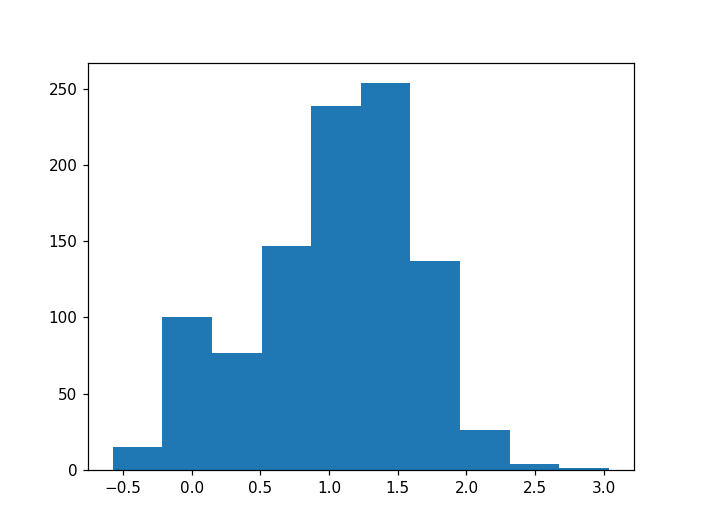

(array([ 15., 100.,  77., 147., 239., 254., 137.,  26.,   4.,   1.]),
 array([-0.57479394, -0.21366551,  0.14746291,  0.50859133,  0.86971976,
         1.23084818,  1.59197661,  1.95310503,  2.31423346,  2.67536188,
         3.03649031]),
 <BarContainer object of 10 artists>)

In [24]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.hist(brtts_mat[:,1] - brtts_mat[:,0])

In [27]:
brtts_mat_df = pd.DataFrame(brtts_mat)
brtts_mat_df.columns = ['LP', 'HP']
brtts_mat_df.to_csv('/home/karthik/jupyter_dir/SDMS/diff_potential_RI.csv')

,0,1
0,0.297159,1.658032
1,0.467400,1.681300
2,0.463494,1.732479
3,0.621665,2.354234
4,1.931286,2.740650
...,...,...
995,0.355042,1.731227
996,0.920816,2.333577
997,0.280666,0.307676
998,0.356059,1.756587


## differential potential - unidirectional force ##

In [204]:
df0 = 1.25*(0.15 * x**2 * (0.15 * x**2 - 1)+0)

def nonSDMS_nonF_fun_LP_aF(t, u, M, tend, t_step, F):

    from scipy.interpolate import interp1d

    x1 = u[0]
    x2 = u[1]

    xs = np.arange(len(F))
    y_interp = interp1d(xs, F)
    Frc = y_interp(t/t_step)


    ##Force dependent spring-damper##
    Ki = k2(np.abs(Frc)); Ci = c2(np.abs(Frc)) 
    print(['Ki', Ki]); print(['Ci', Ci])
    ##Dynamic potential##

    y2int = Ki*df0
    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)
    spring_val = (y1dif_fun(x1))
    print(["spring cons = ", spring_val ])

    ##Dynamic damper 
    damp_cons = Ci*0.5*(3.5-0.25*x1**3 + 2*x1)
    print(["damper cons = ", damp_cons ])

    du = np.zeros([2, 1])

    du[0] = x2
    du[1] = (1/M)*(Frc - damp_cons*x2 + spring_val)

    du = du.reshape(2)

    return(du)

In [60]:
def nonSDMS_nonF_fun_HP_aF(t, u, M, tend, t_step, F):

    from scipy.interpolate import interp1d

    x1 = u[0]
    x2 = u[1]

    xs = np.arange(len(F))
    y_interp = interp1d(xs, F)
    Frc = y_interp(t/t_step)

    # print(t)
    print(["force = ", Frc])
    ##Force dependent spring-damper##
    Ki = k2(np.abs(Frc)); Ci = c2(np.abs(Frc)) 
    print(['Ki', Ki]); print(['Ci', Ci])
    ##Dynamic potential##

    y2int = Ki*df
    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)
    spring_val = (y1dif_fun(x1))
    print(["spring cons = ", spring_val ])

    ##Dynamic damper 
    damp_cons = Ci*0.5*(3.5-0.25*x1**3 + 2*x1)
    print(["damper cons = ", damp_cons ])

    du = np.zeros([2, 1])

    du[0] = x2
    du[1] = (1/M)*(Frc - damp_cons*x2 + spring_val)

    du = du.reshape(2)

    return(du)

In [55]:
# import random as rn
# import pylab as pl

# %matplotlib inline
# def varying_extForce(N, Ts, ampl, mg):
#     x0=pl.arange(0,N,Ts)
#     sigs = np.zeros([10, len(x0)])

#     phi = pl.linspace(0.001, 0.3, 100)
#     amp = pl.linspace(2, 5, 100)

#     for i in np.arange(10):

#         amp1 = amp[rn.randint(0, 99)]
#         phi1 = phi[rn.randint(0, 99)]

#         y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
#         sigs[i:] = y1

#     sigs1 = ampl*np.apply_along_axis(np.mean, 0, sigs)
#     plt.plot(sigs1)
#     return(sigs1)


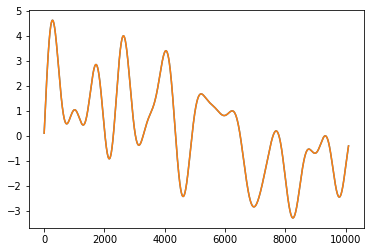

In [243]:
from scipy.integrate import solve_ivp

tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))
%matplotlib inline
#extF= -1*stats.zscore(varying_extForce(tend+1, t_step, 3, 0.05))
extF= (varying_extForce(tend+1, t_step, 2, 0.05))
plt.plot(extF)

In [54]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, 3*extF)
start_time = timeit.default_timer()
sl22 = solve_ivp (nonSDMS_nonF_fun_LP_aF, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

NameError: name 'nonSDMS_nonF_fun_LP_aF' is not defined

In [ ]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, 3*extF)
start_time = timeit.default_timer()
slh1 = solve_ivp (nonSDMS_nonF_fun_HP_aF, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

In [ ]:
%matplotlib notebook
plt.plot(sl22.y[0], label = 'low resilience')
plt.plot(slh1.y[0], label = 'high resilience')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


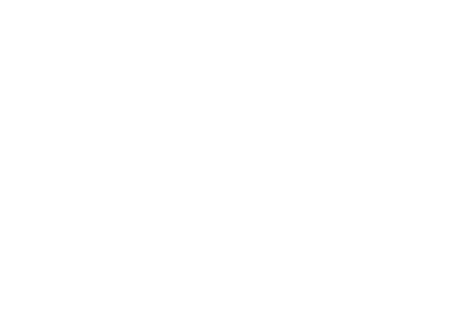

[ 644  865 1121 1392 1833 2312 2833 3292 4142 4954 5559 6062 6326 7378
 7791 8109 8136 8337 8838 9073 9432 9730]
10000
(22,)
           nd     t   id
0    2.444928   644    1
1    2.444928   645    2
2    2.444892   646    3
3    2.444821   647    4
4    2.444715   648    5
..        ...   ...  ...
472  2.373433  1116  473
473  2.373494  1117  474
474  2.373540  1118  475
475  2.373574  1119  476
476  2.373593  1120  477

[477 rows x 3 columns]


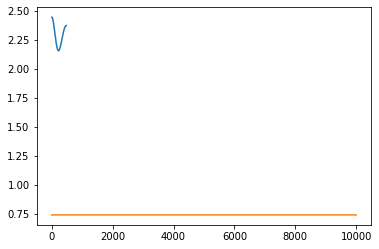

0
           nd     t   id
0    2.373600  1121    1
1    2.373592  1122    2
2    2.373571  1123    3
3    2.373537  1124    4
4    2.373489  1125    5
..        ...   ...  ...
707  2.712615  1828  708
708  2.712677  1829  709
709  2.712725  1830  710
710  2.712759  1831  711
711  2.712778  1832  712

[712 rows x 3 columns]


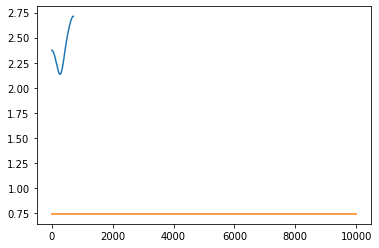

1
           nd     t    id
0    2.712784  1833     1
1    2.712775  1834     2
2    2.712751  1835     3
3    2.712713  1836     4
4    2.712660  1837     5
..        ...   ...   ...
995  2.726639  2828   996
996  2.726747  2829   997
997  2.726833  2830   998
998  2.726896  2831   999
999  2.726936  2832  1000

[1000 rows x 3 columns]


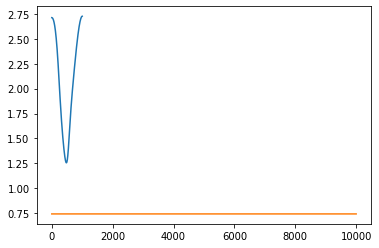

2
            nd     t    id
0     2.726954  2833     1
1     2.726949  2834     2
2     2.726921  2835     3
3     2.726871  2836     4
4     2.726797  2837     5
...        ...   ...   ...
1304  2.815169  4137  1305
1305  2.815215  4138  1306
1306  2.815251  4139  1307
1307  2.815276  4140  1308
1308  2.815291  4141  1309

[1309 rows x 3 columns]


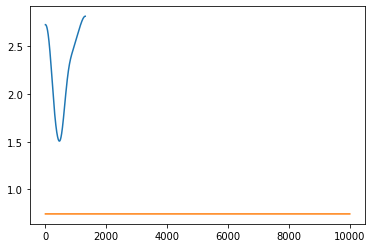

3
            nd     t    id
0     2.815296  4142     1
1     2.815291  4143     2
2     2.815275  4144     3
3     2.815249  4145     4
4     2.815213  4146     5
...        ...   ...   ...
1412  2.474701  5554  1413
1413  2.474741  5555  1414
1414  2.474771  5556  1415
1415  2.474792  5557  1416
1416  2.474803  5558  1417

[1417 rows x 3 columns]


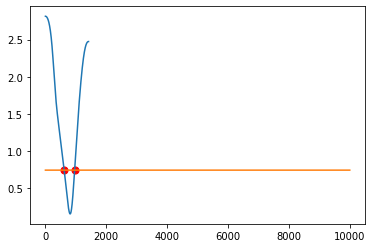

4
           nd     t   id
0    2.474804  5559    1
1    2.474796  5560    2
2    2.474779  5561    3
3    2.474753  5562    4
4    2.474718  5563    5
..        ...   ...  ...
762  2.362144  6321  763
763  2.362174  6322  764
764  2.362198  6323  765
765  2.362215  6324  766
766  2.362226  6325  767

[767 rows x 3 columns]


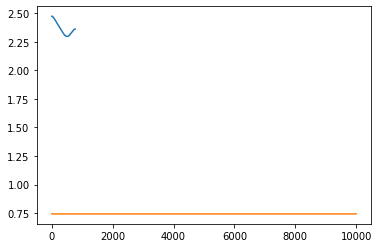

5
            nd     t    id
0     2.362231  6326     1
1     2.362229  6327     2
2     2.362221  6328     3
3     2.362205  6329     4
4     2.362184  6330     5
...        ...   ...   ...
1460 -1.232930  7786  1461
1461 -1.232770  7787  1462
1462 -1.232645  7788  1463
1463 -1.232553  7789  1464
1464 -1.232497  7790  1465

[1465 rows x 3 columns]


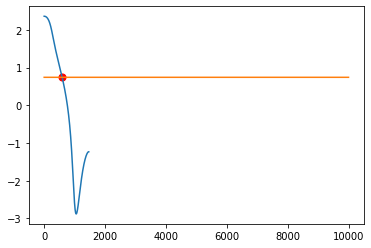

6
           nd     t   id
0   -1.232475  7791    1
1   -1.232488  7792    2
2   -1.232537  7793    3
3   -1.232622  7794    4
4   -1.232743  7795    5
..        ...   ...  ...
340 -2.763419  8131  341
341 -2.763396  8132  342
342 -2.763379  8133  343
343 -2.763366  8134  344
344 -2.763359  8135  345

[345 rows x 3 columns]


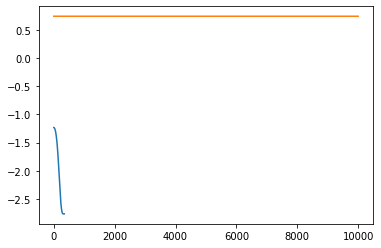

7
           nd     t   id
0   -2.763357  8136    1
1   -2.763362  8137    2
2   -2.763372  8138    3
3   -2.763388  8139    4
4   -2.763411  8140    5
..        ...   ...  ...
697 -2.073375  8833  698
698 -2.073265  8834  699
699 -2.073179  8835  700
700 -2.073115  8836  701
701 -2.073074  8837  702

[702 rows x 3 columns]


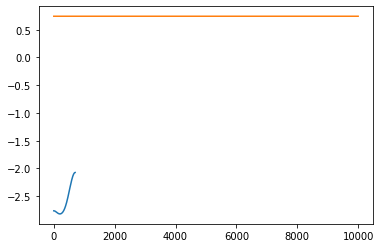

8
           nd     t   id
0   -2.073056  8838    1
1   -2.073061  8839    2
2   -2.073089  8840    3
3   -2.073139  8841    4
4   -2.073213  8842    5
..        ...   ...  ...
589 -1.643015  9427  590
590 -1.642816  9428  591
591 -1.642657  9429  592
592 -1.642540  9430  593
593 -1.642464  9431  594

[594 rows x 3 columns]


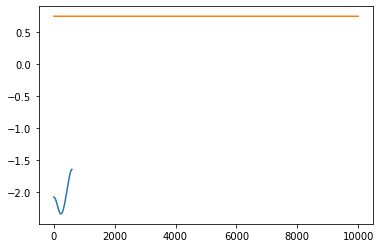

9
           nd     t   id
0   -1.642430  9432    1
1   -1.642438  9433    2
2   -1.642489  9434    3
3   -1.642583  9435    4
4   -1.642720  9436    5
..        ...   ...  ...
563 -2.592529  9995  564
564 -2.590786  9996  565
565 -2.589026  9997  566
566 -2.587248  9998  567
567 -2.585452  9999  568

[568 rows x 3 columns]


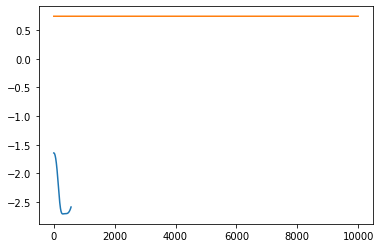

10
[[1.06427921e-03 1.70270913e+00 0.00000000e+00 0.00000000e+00]
 [1.14843334e-03 1.63138065e+00 0.00000000e+00 0.00000000e+00]
 [2.93200961e-03 1.97056479e+00 0.00000000e+00 0.00000000e+00]
 [1.93487464e-03 1.98473543e+00 0.00000000e+00 0.00000000e+00]
 [3.52071462e-03 2.07307751e+00 6.17000000e+02 9.60000000e+02]
 [3.15392173e-04 1.73258520e+00 0.00000000e+00 0.00000000e+00]
 [4.70880128e-03 1.62001200e+00 5.92000000e+02 0.00000000e+00]
 [4.45507507e-03 1.97469362e+00 0.00000000e+00 0.00000000e+00]
 [1.14413975e-03 3.50557628e+00 0.00000000e+00 0.00000000e+00]
 [1.60951143e-03 2.81527523e+00 0.00000000e+00 0.00000000e+00]
 [2.08791399e-03 2.38464871e+00 0.00000000e+00 0.00000000e+00]]
[ nan  nan  nan  nan 617.  nan 592.  nan  nan  nan  nan  nan  nan  nan
  nan 960.  nan  nan  nan  nan  nan  nan]
[592. 617. 960.]


<IPython.core.display.Javascript object>


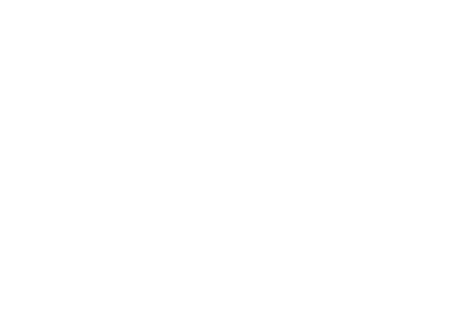

[ 628  794  996 1352 1757 2253 2668 3212 3516 3590 4072 4835 5143 5269
 5378 6008 6277 7539 7963 8719 9466]
10000
(21,)
           nd    t   id
0    3.086542  628    1
1    3.086515  629    2
2    3.086391  630    3
3    3.086169  631    4
4    3.085850  632    5
..        ...  ...  ...
363  2.964161  991  364
364  2.964243  992  365
365  2.964305  993  366
366  2.964347  994  367
367  2.964370  995  368

[368 rows x 3 columns]


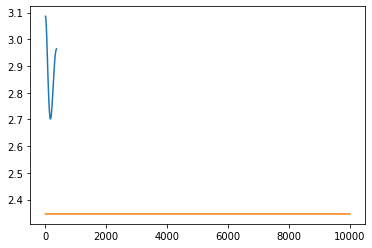

0
           nd     t   id
0    2.964373   996    1
1    2.964357   997    2
2    2.964323   998    3
3    2.964270   999    4
4    2.964199  1000    5
..        ...   ...  ...
756  3.134662  1752  757
757  3.134694  1753  758
758  3.134720  1754  759
759  3.134738  1755  760
760  3.134748  1756  761

[761 rows x 3 columns]


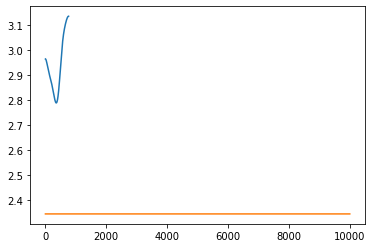

1
           nd     t   id
0    3.134751  1757    1
1    3.134747  1758    2
2    3.134735  1759    3
3    3.134716  1760    4
4    3.134689  1761    5
..        ...   ...  ...
906  3.224158  2663  907
907  3.224201  2664  908
908  3.224235  2665  909
909  3.224260  2666  910
910  3.224277  2667  911

[911 rows x 3 columns]


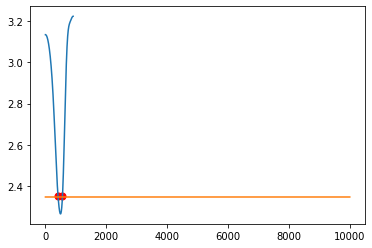

2
           nd     t   id
0    3.224285  2668    1
1    3.224284  2669    2
2    3.224274  2670    3
3    3.224255  2671    4
4    3.224227  2672    5
..        ...   ...  ...
843  2.925571  3511  844
844  2.925628  3512  845
845  2.925671  3513  846
846  2.925699  3514  847
847  2.925713  3515  848

[848 rows x 3 columns]


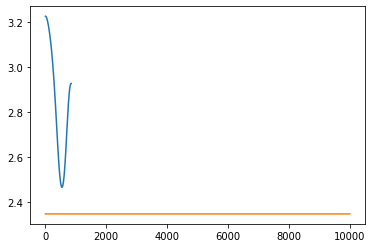

3
           nd     t   id
0    2.925714  3516    1
1    2.925701  3517    2
2    2.925677  3518    3
3    2.925639  3519    4
4    2.925590  3520    5
..        ...   ...  ...
551  3.178998  4067  552
552  3.179026  4068  553
553  3.179049  4069  554
554  3.179066  4070  555
555  3.179078  4071  556

[556 rows x 3 columns]


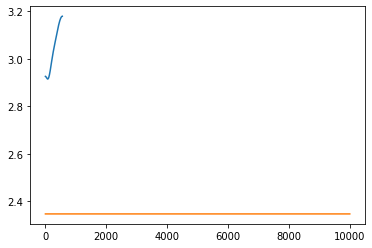

4
            nd     t    id
0     3.179083  4072     1
1     3.179083  4073     2
2     3.179077  4074     3
3     3.179065  4075     4
4     3.179047  4076     5
...        ...   ...   ...
1066  3.126208  5138  1067
1067  3.126563  5139  1068
1068  3.126833  5140  1069
1069  3.127018  5141  1070
1070  3.127119  5142  1071

[1071 rows x 3 columns]


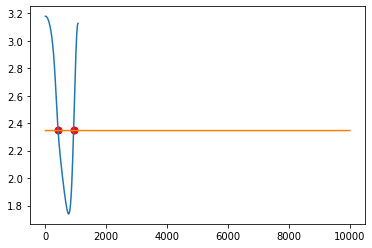

5
           nd     t   id
0    3.127137  5143    1
1    3.127074  5144    2
2    3.126932  5145    3
3    3.126710  5146    4
4    3.126411  5147    5
..        ...   ...  ...
230  3.009002  5373  231
231  3.009048  5374  232
232  3.009084  5375  233
233  3.009109  5376  234
234  3.009123  5377  235

[235 rows x 3 columns]


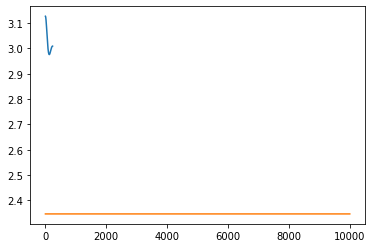

6
           nd     t   id
0    3.009127  5378    1
1    3.009120  5379    2
2    3.009103  5380    3
3    3.009075  5381    4
4    3.009037  5382    5
..        ...   ...  ...
894  2.926090  6272  895
895  2.926106  6273  896
896  2.926119  6274  897
897  2.926128  6275  898
898  2.926134  6276  899

[899 rows x 3 columns]


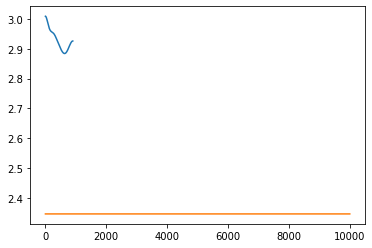

7
            nd     t    id
0     2.926136  6277     1
1     2.926134  6278     2
2     2.926128  6279     3
3     2.926119  6280     4
4     2.926106  6281     5
...        ...   ...   ...
1681  2.376662  7958  1682
1682  2.376927  7959  1683
1683  2.377133  7960  1684
1684  2.377282  7961  1685
1685  2.377373  7962  1686

[1686 rows x 3 columns]


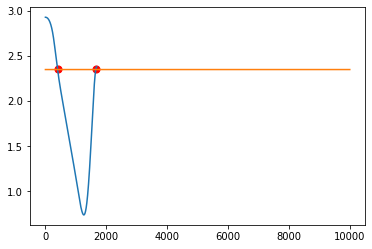

8
            nd     t    id
0     2.377408  7963     1
1     2.377386  7964     2
2     2.377309  7965     3
3     2.377176  7966     4
4     2.376990  7967     5
...        ...   ...   ...
1498  2.796601  9461  1499
1499  2.796955  9462  1500
1500  2.797224  9463  1501
1501  2.797411  9464  1502
1502  2.797513  9465  1503

[1503 rows x 3 columns]


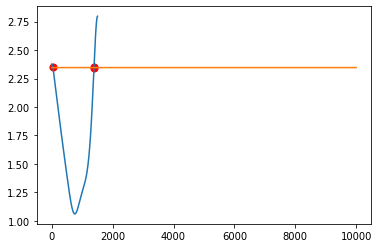

9
[[1.76355158e-03 7.40228368e-01 0.00000000e+00 0.00000000e+00]
 [6.85764123e-04 6.18059508e-01 0.00000000e+00 0.00000000e+00]
 [2.01189771e-03 7.88437784e-01 4.18000000e+02 5.60000000e+02]
 [1.44161428e-03 8.77971402e-01 0.00000000e+00 0.00000000e+00]
 [4.96591454e-04 5.79400187e-01 0.00000000e+00 0.00000000e+00]
 [2.64299509e-03 8.32769571e-01 4.16000000e+02 9.26000000e+02]
 [7.90446015e-04 7.80823636e-01 0.00000000e+00 0.00000000e+00]
 [1.85930207e-04 6.62813643e-01 0.00000000e+00 0.00000000e+00]
 [2.27506125e-03 5.79822056e-01 4.00000000e+02 1.65500000e+03]
 [2.03305238e-03 3.10940487e-02 3.70000000e+01 1.38700000e+03]]
[  nan   nan  418.   nan   nan  416.   nan   nan  400.   37.   nan   nan
  560.   nan   nan  926.   nan   nan 1655. 1387.]
[  37.  400.  416.  418.  560.  926. 1387. 1655.]


In [248]:
RRts1 = resilience_calc_func(sl22.y[0])
RRts2 = resilience_calc_func(slh1.y[0])


In [249]:
RRts = (np.vstack((RRts1, RRts2)))
np.transpose(RRts)

array([[2.26555865e-03, 1.43269041e-03],
       [2.12684169e+00, 6.31148997e-01],
       [8.78800000e+02, 8.83800000e+02],
       [8.63636364e-01, 6.00000000e-01],
       [1.38518356e-03, 7.98809076e-04],
       [5.51827966e-01, 2.25537728e-01],
       [1.25512564e+03, 1.36885120e+03]])

In [250]:
from scipy import stats

retrt = stats.zscore(RRts, axis=0)
retrt1 = np.apply_along_axis(np.mean, 1, retrt)
retrt1

array([ 0.42857143, -0.42857143])

## Gradient of force for different potentials ##

In [199]:
def sdms_simu(j):

    extF= varying_extForce(tend+0.01, t_step, 0.6, 0.05)
    extF1 = extF[:-1]
    
    iters = np.around((np.arange(0.1, 4, 0.2)),3)
    sdms_dt = np.zeros((len(iters), 20000))
    
    for i in np.arange(len(iters)):
    
        u0=np.array([0, 0])
        Fc = extF*iters[i]
        p = (1, tend, t_step, Fc)
        start_time = timeit.default_timer()
        LP_deq = solve_ivp (nonSDMS_nonF_fun_LP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        HP_deq = solve_ivp (nonSDMS_nonF_fun_HP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        print(timeit.default_timer() - start_time)
        
        if len(HP_deq.y[0]) < 10000: 
            continue

        if len(LP_deq.y[0]) < 10000: 
            continue 


        deq = np.hstack((LP_deq.y[0], HP_deq.y[0]))
        sdms_dt[i] = deq


    ExtF = np.hstack((extF1, extF1))
    sdms_dt0 = np.vstack((sdms_dt, ExtF))    
    sdms_dtt = np.transpose(sdms_dt0) 
    
    id='{0:02}'.format(j)
    DF = pd.DataFrame(sdms_dtt)
    fnm = "/home/karthik/jupyter_dir/SDMS/simu_gradientF_potential" + id + ".csv"
    DF.to_csv(fnm)
    print(j)

In [127]:
# for j in np.arange(24):
#     extF= varying_extForce(tend+0.01, t_step, 4, 0.05)
#     extF1 = extF[:-1]
    
#     iters = np.around((np.arange(0.1, 3.5, 0.2)),3)
#     sdms_dt = np.zeros((len(iters), 20000))
    
#     for i in np.arange(len(iters)):
    
#         u0=np.array([0, 0])
#         Fc = extF*iters[i]
#         print(iters[i])
#         p = (1, tend, t_step, Fc)
#         start_time = timeit.default_timer()
#         LP_deq = solve_ivp (nonSDMS_nonF_fun_LP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
#         HP_deq = solve_ivp (nonSDMS_nonF_fun_HP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
#         print(timeit.default_timer() - start_time)
        
#         if len(HP_deq.y[0]) < 10000: 
#             continue

#         if len(LP_deq.y[0]) < 10000: 
#             continue 

#         deq = np.hstack((np.around(LP_deq.y[0],4), np.around(HP_deq.y[0],4)))
#         sdms_dt[i] = deq


#     ExtF = np.hstack((extF1, extF1))
#     sdms_dt0 = np.vstack((sdms_dt, ExtF))    
#     sdms_dtt = np.transpose(sdms_dt0) 
    
#     id='{0:02}'.format(j)
#     DF = pd.DataFrame(sdms_dtt)
#     fnm = "/home/karthik/jupyter_dir/SDMS/simu_gradientF_potential" + id + ".csv"
#     DF.to_csv(fnm)
#     print(['j = ', j])

In [200]:
from joblib import Parallel, delayed
Parallel(n_jobs=8)(delayed(sdms_simu)(j) for j in np.arange(29))

36.65356738201808
43.626406401977874
47.83845859701978
52.68162229296286
55.8825768759707
59.44615915499162
62.479511479032226
63.3463652189821
66.97465641400777
67.00178867700743
72.55445270601194
74.07954797201091
80.87697678100085
81.54572485998506
84.58709541795542
87.17360775801353
90.72501273395028
91.21380929503357
93.16415753000183
96.07521025900496
2
35.97587308101356
43.32986132695805
51.791763162007555
55.58034485799726
57.04892136401031
63.19927985599497
62.628608053026255
64.43595074600307
66.83881222899072
69.24600415397435
75.37907442299183
78.73272962897317
82.16069757100195
84.34009007300483
84.18320523900911
86.36004221602343
87.36327782197623
88.02149879699573
92.98814126598882
95.9055570330238
12
41.33048164797947
49.01088359998539
56.98189410701161
65.28124183200998
64.86834889295278
67.78067823802121
74.90551643096842
77.64715150697157
82.72673818399198
85.88876024197089
86.93722277495544
89.94088266999461
95.8240621680161
94.65089459402952
93.87601708597504
95.09

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

34.54868632304715
42.019445147016086
46.59758533898275
50.544459509023
54.82270763401175
59.427524255996104
63.11358517600456
67.1406964060152
68.69528269901639
70.92527650896227
73.46967780397972
78.40163116098847
79.07326322398148
80.65097498398973
83.64178221899783
84.88810633099638
88.20743149495684
90.01854195597116
93.40085148997605
94.59469315997558
4
31.621741492999718
37.38518307299819
42.03962126496481
48.94168648601044
50.298565130040515
51.80019685300067
58.64718368300237
57.710124303004704
58.87997978396015
61.385070513002574
62.50403778103646
67.89903262798907
69.93641921802191
72.84798669599695
75.17903443600517
75.46855391800636
77.07782308699097
79.40702107001562
77.02322283899412
78.53270289098145
11
39.26508969900897
46.87472574599087
51.02990227699047
56.145189427013975
62.290513281011954
64.38376808702014
74.10510461300146
70.25860552897211
74.54450810200069
75.3788602569839
82.61576894001337
83.7807948050322
83.991544575023
87.0739406819921
85.52252431301167
91.21

In [53]:
import os
fls1 = os.listdir('gradient_F_diffPotential/')
fls = list(filter(lambda f:f.startswith('simu_gradientF_potential'), fls1))
len(fls)

29

In [55]:
import import_ipynb
%run /home/karthik/jupyter_dir/trophic_temp/trophic_temp/IRI_calc.ipynb

In [56]:
def extremums(ts):
    
    from scipy.signal import argrelextrema

    fitt = ts

    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate(([0], maxs.ravel(), mins.ravel(), [9999]))
    pks1 = np.sort(pks)
    
    cyc_pks1 = np.concatenate(([0], mins.ravel(), [9999]))
    
    return([pks1, cyc_pks1])

In [57]:
for i in np.arange(len(fls)):
    
    df1 = pd.read_csv('gradient_F_diffPotential/' + fls[i])
    df1 = pd.read_csv('gradient_F_diffPotential/' + fls[i])
    df = df1.iloc[:,1:]

    df_lp0 = df.iloc[0:10000]
    df_hp0 = df.iloc[10000:20000]

    df_lp = df_lp0.iloc[500:]
    df_hp = df_hp0.iloc[500:]

    nams0 = np.array(df_hp.columns)
    nams = (nams0[-21:])
    nams = nams[:-1].astype(int)

    rrts = np.zeros([1,8])
    frc_idx = np.zeros([1,7])

    iters = np.around((np.arange(0.1, 4, 0.2)),3)

    for j in np.arange(len(nams)):

        rtts1 = resilience_calc_func(np.array(df_lp.iloc[:,nams[j]]))
        rtts2 = resilience_calc_func(np.array(df_hp.iloc[:,nams[j]]))

        rrts_low = np.hstack((['low'], rtts1))
        rrts_high = np.hstack((['high'], rtts2))

        rrts0 = np.vstack((rrts_low, rrts_high))
        rrts = np.vstack((rrts, rrts0))


        F_ts = np.array(df_lp0.iloc[:,20]*iters[j])
        cyc_pks = extremums(np.array(F_ts))[1]


        F_extrms = F_ts[extremums(F_ts)[0]]
        F_ampls = (np.ediff1d(F_extrms))[np.arange(0, len(np.ediff1d(F_extrms)), 2)]
        F_tmp = (np.ediff1d(cyc_pks))

        frc_idx0 = np.array([iters[j], np.mean(F_ts), np.std(F_ts),
                             np.mean(F_ampls), np.std(F_ampls), 
                             np.mean(F_tmp), np.std(F_tmp)])
        frc_id = np.vstack((frc_idx0, frc_idx0))
        frc_idx = np.vstack((frc_idx, frc_id))

    rrts_dat = np.hstack((rrts, frc_idx))
    rrts_dt = np.delete(rrts_dat, 0, 0)
    rrts_dt1 = pd.DataFrame(rrts_dt)

    id='{0:02}'.format(i)
    fnm = "/home/karthik/jupyter_dir/SDMS/simu_gradientF_results_" + id + ".csv"
    rrts_dt1.to_csv(fnm)
    print(id)

[272. 145. 299. 385. 311. 256.  nan  nan 284.  nan 297. 610. 388. 765.
 530. 481. 782.  nan  nan 737.  nan  nan]
[145. 256. 272. 284. 297. 299. 311. 385. 388. 481. 530. 610. 737. 765.
 782.]
[119. 157.  nan 417.  nan  nan  nan 369.  nan  nan 423.  nan  nan 287.
 247.  nan 667.  nan  nan  nan 522.  nan  nan 579.  nan  nan]
[119. 157. 247. 287. 369. 417. 423. 522. 579. 667.]
[  nan  142.  476.  252.  279.  225.  208.  326.  234.  291.  237.   nan
   nan   nan  831.  707.  561. 1101.  515.  824.  329.  238.]
[ 142.  208.  225.  234.  237.  238.  252.  279.  291.  326.  329.  476.
  515.  561.  707.  824.  831. 1101.]
[ 99. 118. 494. 272. 314.  nan 214. 227. 357. 320. 254. 271. 240. 295.
  nan  nan 804. 679.  nan 552.  nan  nan 542. 791. 444.  nan]
[ 99. 118. 214. 227. 240. 254. 271. 272. 295. 314. 320. 357. 444. 494.
 542. 552. 679. 791. 804.]
[ 190.  149.  464.  259.  276.  234.  211.  340.  241.   nan  245.  378.
   nan   nan  861.  678.  562. 1093.  509.  844.   nan   nan]
[ 149.  190.

[ 245.   nan  164.  331.  325.  226.  427.  123.  747.   nan  612.   nan
  585.  894.  575.  355.  751.  651. 1053.   nan]
[ 123.  164.  226.  245.  325.  331.  355.  427.  575.  585.  612.  651.
  747.  751.  894. 1053.]
[116. 138.  nan 302. 540.  nan  nan  nan 227.  nan  nan  nan 300. 247.
  nan 462. 676.  nan  nan  nan 575.  nan  nan  nan]
[116. 138. 227. 247. 300. 302. 462. 540. 575. 676.]
[ 429.  137.   67.  281.  233.  461.  376.   49.  678.  255.  995.  519.
  633.  975.   nan   nan  850.  699. 1117.  391.]
[  49.   67.  137.  233.  255.  281.  376.  391.  429.  461.  519.  633.
  678.  699.  850.  975.  995. 1117.]
[106. 100. 141. 101. 315. 232.  81. 340. 100.  nan 209. 243. 284. 534.
 509. 613. 988. 685. 496. 747. 663.  nan 626. 460.]
[ 81. 100. 100. 101. 106. 141. 209. 232. 243. 284. 315. 340. 460. 496.
 509. 534. 613. 626. 663. 685. 747. 988.]
[ 540.  156.   92.  287.  245.   72.  384.   64.  672.  274. 1069.  483.
  636.  980.  714.  448.  840.  728. 1097.  371.]
[  64.   7

[616.  nan 730. 206.  nan  nan 522. 742. 410.  nan  nan  nan  nan 815.
  nan  nan  nan  nan 707.  nan]
[206. 410. 522. 616. 707. 730. 742. 815.]
[  nan  451.   nan  340.  105.   nan  587.  172.  550.   nan   nan  652.
   nan 1231. 1037.   nan  723. 1013.  631.   nan]
[ 105.  172.  340.  451.  550.  587.  631.  652.  723. 1013. 1037. 1231.]
01
[ nan 298. 172.  nan  nan  nan  nan  nan 288. 231. 152. 597.  nan 551.
 472.  nan  nan  nan  nan  nan 509. 621.  nan  nan]
[152. 172. 231. 288. 298. 472. 509. 551. 597. 621.]
[140.  nan  nan  nan  nan  nan  nan  nan  nan  nan 323. 254. 220. 233.
  nan  nan  nan  nan  nan  nan  nan  nan  nan 520. 575. 489.]
[140. 220. 233. 254. 323. 489. 520. 575.]
[ nan 230.  60. 224.  nan  nan  nan 253. 232. 188.  94. 679.  nan 683.
 539. 427.  nan  nan  nan 467. 576. 697.  nan  nan]
[ 60.  94. 188. 224. 230. 232. 253. 427. 467. 539. 576. 679. 683. 697.]
[ nan  nan 225. 110. 233. 352. 356.  nan 240. 244. 216. 136.  41.  nan
  nan 616. 545. 482. 470. 455.  nan 491

[ 111.   nan  335.   nan  215.   nan  236.  211.  303.  714.  145.  302.
   nan 1004.   nan  786.   nan  752.  623.  548. 1469.  888.]
[ 111.  145.  211.  215.  236.  302.  303.  335.  548.  623.  714.  752.
  786.  888. 1004. 1469.]
[ nan 757.  nan  nan  nan  nan 967.  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[757. 967.]
[ 123.   nan  356.   nan  151.   nan  254.  236.  346.  754.  197.  278.
   nan 1039.   nan  690.   nan  753.  624.  544. 1407.  895.]
[ 123.  151.  197.  236.  254.  278.  346.  356.  544.  624.  690.  753.
  754.  895. 1039. 1407.]
[  nan  636.  269.   nan   nan  824.   nan  676.   nan 1319.   nan   nan
   nan   nan   nan 1000.]
[ 269.  636.  676.  824. 1000. 1319.]
[ 160.   nan  376.   nan   89.   nan   nan  284.  277.  429.  805.  267.
   nan  221.   nan 1146.   nan  568.   nan   nan  751.  610.  498. 1319.
  915.   nan]
[  89.  160.  221.  267.  277.  284.  376.  429.  498.  568.  610.  751.
  805.  915. 1146. 1319.]
[  nan  446.  122.   nan  427. 

[  nan   nan   nan   nan   nan  407.   nan  710.   nan   nan   nan   nan
   nan   nan   nan   nan  531.   nan 2547.   nan   nan   nan]
[ 407.  531.  710. 2547.]
[ nan  nan  nan  nan 327.  99. 294. 914.  nan  nan 390.  nan  nan  nan
  nan 871. 577.  nan  nan  nan  nan 653.]
[ 99. 294. 327. 390. 577. 653. 871. 914.]
[  nan   nan   nan   nan  435.  316.   nan  438.   nan   nan  529.   nan
   nan   nan   nan  625.  592.   nan 2191.   nan   nan  592.]
[ 316.  435.  438.  529.  592.  592.  625. 2191.]
[ nan  nan  nan  nan 350. 812. 221. 857.  nan  nan 411.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan 653.]
[221. 350. 411. 653. 812. 857.]
[ nan  nan  nan  nan 456. 311. 614. 754.  nan  nan  nan  nan  nan  nan
  nan 640. 602.  nan  nan  nan  nan  nan]
[311. 456. 602. 614. 640. 754.]
[  nan   nan   nan   nan  351.  235.  863.   nan   nan  408.   nan   nan
   nan   nan 1694.   nan   nan   nan   nan  676.]
[ 235.  351.  408.  676.  863. 1694.]
[  nan   nan   nan   nan  474.  294.  562. 1044.

[  nan 1058.   nan   nan   nan  755.   nan  730.  645.   nan  396.   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 396.  645.  730.  755. 1058.]
[  nan  896.  103.  166.  631.   nan  482.  589.   nan  739.   nan   nan
 1480.  643.   nan   nan   nan   nan   nan   nan   nan   nan]
[ 103.  166.  482.  589.  631.  643.  739.  896. 1480.]
[  nan 1037.   nan   nan   nan  672.   nan  699.  696.   nan  354.   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 354.  672.  696.  699. 1037.]
[  nan  887.   93.  170.  624.   nan  471.  601.   nan  688.   nan   nan
 1480.  630.   nan   nan   nan   nan   nan   nan   nan   nan]
[  93.  170.  471.  601.  624.  630.  688.  887. 1480.]
[  nan 1022.   nan   nan   nan  633.   nan  654.  741.   nan  324.   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 324.  633.  654.  741. 1022.]
[ 879.   74.  172.  617.   nan  462.  612.   nan  648.   nan 1492.  623.
   nan   nan   nan   nan   nan   nan   nan  

[ 119.   nan   nan   nan   nan  581.   nan  361.  112.  857.   nan  464.
  636.   nan   nan   nan   nan  910.   nan 1010.   nan  858.   nan   nan]
[ 112.  119.  361.  464.  581.  636.  857.  858.  910. 1010.]
[338. 118. 146. 304. 581. 356. 290. 164.  nan 828. 862. 947. 975.  nan
  nan 702. 551.  nan  nan  nan]
[118. 146. 164. 290. 304. 338. 356. 551. 581. 702. 828. 862. 947. 975.]
[ 118.   nan   nan   nan   nan  567.   nan  339.  125.  776.   nan  448.
  640.   nan   nan   nan   nan 1032.   nan  971.   nan   nan   nan   nan]
[ 118.  125.  339.  448.  567.  640.  776.  971. 1032.]
[344. 147. 192. 293. 557. 351. 279. 167.  nan 822. 859. 919. 936.  nan
  nan 707. 575.  nan  nan  nan]
[147. 167. 192. 279. 293. 344. 351. 557. 575. 707. 822. 859. 919. 936.]
[ 121.   nan   nan   nan   nan  565.  184.  143.  700.   nan  445.  636.
   nan   nan   nan   nan 1448.  771.   nan   nan   nan   nan]
[ 121.  143.  184.  445.  565.  636.  700.  771. 1448.]
[348. 180. 227. 282. 549. 342. 270. 182.  nan 8

[ nan 346. 381. 109.  93.  nan  nan 208. 196. 170.  nan  nan 952. 985.
 712. 569.  nan  nan 819. 472. 830.  nan]
[ 93. 109. 170. 196. 208. 346. 381. 472. 569. 712. 819. 830. 952. 985.]
[ nan 239. 243. 134. 170.  nan 119. 183. 109. 440.  nan 631. 702. 543.
 590.  nan 710. 591. 565. 962.]
[109. 119. 134. 170. 183. 239. 243. 440. 543. 565. 590. 591. 631. 702.
 710. 962.]
[  nan  339.  402.   95.  136.   nan   nan  199.  184.  133.   nan   nan
  923. 1030.  671.  434.   nan   nan  818.  536.  823.   nan]
[  95.  133.  136.  184.  199.  339.  402.  434.  536.  671.  818.  823.
  923. 1030.]
[  nan  232.  241.  130.  167.  670.  175.  119.  424.   nan  616.  703.
  532.  582. 1325.  569.  560.  940.]
[ 119.  130.  167.  175.  232.  241.  424.  532.  560.  569.  582.  616.
  670.  703.  940. 1325.]
[ nan 334.  nan 251.  83. 165.  nan  nan 192. 175. 696. 624.  nan 889.
  nan 894. 631. 384.  nan  nan 812.  nan  nan 863.]
[ 83. 165. 175. 192. 251. 334. 384. 624. 631. 696. 812. 863. 889. 894.]
[ 

[ 381.  748.   nan  630.  530.   nan  312.  346.   nan   nan   nan 1515.
 1347.   nan  538.   nan]
[ 312.  346.  381.  530.  538.  630.  748. 1347. 1515.]
[  nan  429.  998.   nan   nan  673.  927.   nan   nan   nan  370.   nan
   nan   nan   nan   nan 1744.  983.   nan   nan   nan   nan]
[ 370.  429.  673.  927.  983.  998. 1744.]
[ 381.  754.   nan  619.  516.   nan  306.  331.   nan   nan   nan 1524.
 1331.   nan  557.   nan]
[ 306.  331.  381.  516.  557.  619.  754. 1331. 1524.]
[  nan  433. 1002.   nan  871.  736.   nan   nan   nan  370.   nan   nan
   nan   nan 1974. 1131.   nan   nan   nan   nan]
[ 370.  433.  736.  871. 1002. 1131. 1974.]
08
[  nan  298.  442.   nan  310.  399.  328.  357.   nan  857.  819.   nan
  687. 1130.  750.  670.]
[ 298.  310.  328.  357.  399.  442.  670.  687.  750.  819.  857. 1130.]
[117.  nan 438.  nan  nan 435.  nan 384.  nan 277. 283.  nan 750.  nan
  nan 533.  nan 668.  nan 278.]
[117. 277. 278. 283. 384. 435. 438. 533. 668. 750.]
[ 104.  152. 

[ 121.  169.  550.   nan  324.   nan   nan  191.  479.  329.  193.   nan
  268.  248. 1042.   nan  429.   nan   nan  631.  698.  448.  569.   nan]
[ 121.  169.  191.  193.  248.  268.  324.  329.  429.  448.  479.  550.
  569.  631.  698. 1042.]
[  nan   nan  129.   90.  229.   nan  260.  115.  304.  231.  115.   nan
   nan   nan 1228.  320.  536.   nan  525.  763.  747.  559.  666.   nan]
[  90.  115.  115.  129.  229.  231.  260.  304.  320.  525.  536.  559.
  666.  747.  763. 1228.]
[ 108.   nan   nan  105.  112.  221.  244.  245.  129.  432.  239.  132.
   nan  256.   nan   nan 1117.  422.  548.  417.  536.  682.  866.  572.
  622.   nan]
[ 105.  108.  112.  129.  132.  221.  239.  244.  245.  256.  417.  422.
  432.  536.  548.  572.  622.  682.  866. 1117.]
[  nan   nan  237.   nan  266.   nan  308.  141.  240.  261.  139.   nan
   nan   nan 1232.   nan  507.   nan  479.  904.  622.  523.  715.   nan]
[ 139.  141.  237.  240.  261.  266.  308.  479.  507.  523.  622.  715.
  904

[101. 125.  nan 144. 205. 230.  nan 341.  71. 263. 200. 318. 157. 277.
 454.  nan 823. 697. 566.  nan 564. 723. 816. 626. 548. 441.]
[ 71. 101. 125. 144. 157. 200. 205. 230. 263. 277. 318. 341. 441. 454.
 548. 564. 566. 626. 697. 723. 816. 823.]
[ nan 218.  nan 192. 233. 182.  nan 427.  69. 196. 193. 291. 183.  nan
 486.  nan 881. 786. 497.  nan 534. 838. 714. 646. 465.  nan]
[ 69. 182. 183. 192. 193. 196. 218. 233. 291. 427. 465. 486. 497. 534.
 646. 714. 786. 838. 881.]
[101. 146.  nan 154. 210. 246.  nan 359.  80. 299. 210. 342. 165. 272.
 512.  nan 811. 702. 576.  nan 556. 717. 832. 634. 557. 440.]
[ 80. 101. 146. 154. 165. 210. 210. 246. 272. 299. 342. 359. 440. 512.
 556. 557. 576. 634. 702. 717. 811. 832.]
[ nan 238.  nan 206. 242. 177.  nan  nan  97. 194. 198. 303. 200.  nan
 471.  nan 875. 808. 482.  nan  nan 860. 690. 653. 434.  nan]
[ 97. 177. 194. 198. 200. 206. 238. 242. 303. 434. 471. 482. 653. 690.
 808. 860. 875.]
[103. 176.  nan 164. 216. 261.  nan 378.  90. 328. 222. 

[296. 111. 134. 192. 330. 200. 218. 118.  nan 248. 477. 186. 657. 715.
 411. 459. 437. 519. 499. 943.  nan  nan  nan 571.]
[111. 118. 134. 186. 192. 200. 218. 248. 296. 330. 411. 437. 459. 477.
 499. 519. 571. 657. 715. 943.]
[151. 159. 134. 162. 188. 315. 187. 208. 130.  81.  nan 235. 490. 211.
 168. 514. 634. 508. 499. 516. 529. 526. 693. 322.  nan  nan  nan 594.]
[ 81. 130. 134. 151. 159. 162. 168. 187. 188. 208. 211. 235. 315. 322.
 490. 499. 508. 514. 516. 526. 529. 594. 634. 693.]
[ nan 300. 124.  28. 224.  nan 236. 263. 149.  nan 272. 494. 187.  nan
 635. 902. 245. 444.  nan 495. 445. 896.  nan  nan  nan 550.]
[ 28. 124. 149. 187. 224. 236. 245. 263. 272. 300. 444. 445. 494. 495.
 550. 635. 896. 902.]
[ nan 252. 136. 144. 203. 354. 201. 228. 140. 107.  nan 251. 474. 232.
  nan 592. 658. 487. 504. 522. 530. 525. 685. 306.  nan  nan  nan 613.]
[107. 136. 140. 144. 201. 203. 228. 232. 251. 252. 306. 354. 474. 487.
 504. 522. 525. 530. 592. 613. 658. 685.]
[ nan  nan 301. 850.  nan 

[ 331.   nan   nan   nan   nan  396.  749.   nan   nan 1154.   nan   nan
   nan   nan  397.   nan   nan   nan]
[ 331.  396.  397.  749. 1154.]
[123.  nan 287.  nan 233.  nan 283. 311.  nan 376. 396.  nan 787.  nan
 680.  nan 756.  nan 549. 963.  nan 961. 674.  nan]
[123. 233. 283. 287. 311. 376. 396. 549. 674. 680. 756. 787. 961. 963.]
[ 692.  142.  141.   nan   nan  717.  195.  643.  633. 1141.  845.  142.
   nan   nan   nan  690.   nan   nan]
[ 141.  142.  142.  195.  633.  643.  690.  692.  717.  845. 1141.]
[ 140.   nan  304.   nan  288.   nan  360.  341.   nan  347.  432.   nan
  801.   nan  602.   nan  737.   nan  502. 1049.   nan  940.  624.   nan]
[ 140.  288.  304.  341.  347.  360.  432.  502.  602.  624.  737.  801.
  940. 1049.]
[ 337.   nan   nan   nan   nan  423.  373.  362.   nan 1681.   nan   nan
   nan   nan 1159.   nan   nan   nan]
[ 337.  362.  373.  423. 1159. 1681.]
[ 185.   nan   nan   nan  435.   nan   nan  407.  384.   nan   nan   nan
  848.   nan   nan   nan  6

[  nan   nan  401.  216. 1519.   nan   nan  291.   nan   nan   nan   nan
  569.   nan   nan   nan   nan  583.   nan   nan]
[ 216.  291.  401.  569.  583. 1519.]
[ 93. 382. 377. 223. 130.  nan  nan 306. 329. 243.  nan 410. 403. 358.
 517. 702. 855. 777.  nan  nan 724. 629. 650.  nan 496.  nan]
[ 93. 130. 223. 243. 306. 329. 358. 377. 382. 403. 410. 496. 517. 629.
 650. 702. 724. 777. 855.]
[ 234.   nan  358.  186.   51.  279.   nan  254.   nan   nan  351.   nan
  622.  945. 1393.  516.   nan  655.   nan   nan]
[  51.  186.  234.  254.  279.  351.  358.  516.  622.  655.  945. 1393.]
[ 107.   nan  418.  253.   96.   nan  518.  408.  295.   nan   nan   nan
  463.  346.   nan  702. 1052.  748.   nan  817.  593.  653.   nan   nan
   nan  887.]
[  96.  107.  253.  295.  346.  408.  418.  463.  518.  593.  653.  702.
  748.  817.  887. 1052.]
[ 213.   nan  335.  160.  126.  388.   nan  237.   nan   nan  375.   nan
  665.  820. 1155.  809.   nan  761.   nan   nan]
[ 126.  160.  213.  237.  335

[  nan   nan  287. 1158.   nan   nan  521.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 287.  521. 1158.]
[  nan   nan  474.   nan 1214.   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[ 474. 1214.]
[  nan   nan  267. 1151.   nan   nan  500.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 267.  500. 1151.]
[  nan   nan  452.   nan 1136.   nan   nan   nan  681.   nan   nan   nan
   nan   nan   nan   nan   nan   nan 1153.   nan]
[ 452.  681. 1136. 1153.]
[  nan   nan  247. 1141.   nan   nan  482.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 247.  482. 1141.]
[  nan   nan  498.   nan 1012.   nan   nan   nan  782.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[ 498.  782. 1012.]
[  nan   nan  227. 1129.   nan   nan  466.   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 227.  466. 1129.]
[ nan  nan 487.  nan 974.  nan  nan  nan 733.  

[  nan   nan  473.   nan   nan   nan  440.  227.   nan   nan  794.   nan
   nan   nan   nan  903.   nan   nan   nan 1010.   nan   nan   nan   nan
   nan   nan]
[ 227.  440.  473.  794.  903. 1010.]
[ 282.  332.   nan  388.  325.  236. 1344.   nan  292.  496.  815.   nan
  609.  802.   nan   nan   nan  791.]
[ 236.  282.  292.  325.  332.  388.  496.  609.  791.  802.  815. 1344.]
[  nan   nan  471.   nan   nan   nan  433.  234.   nan   nan  760.   nan
   nan   nan   nan 1030.   nan   nan   nan  959.   nan   nan   nan   nan
   nan   nan]
[ 234.  433.  471.  760.  959. 1030.]
[ 273.  297.   nan  368.  287.  234.   nan 1052.   nan  277.  575.  764.
   nan  691.  752.   nan   nan   nan   nan  747.]
[ 234.  273.  277.  287.  297.  368.  575.  691.  747.  752.  764. 1052.]
[ nan  nan 477. 494.  nan  nan 439. 243.  nan  nan 758. 230.  nan  nan
  nan  nan  nan  nan  nan 914.  nan  nan  nan  nan 396.  nan]
[230. 243. 396. 439. 477. 494. 758. 914.]
[274. 231.  nan 360. 224. 236.  nan 998.  nan 2

[ nan 607. 648.  nan  nan 223.  nan 740.  nan 452. 597. 497.  nan 572.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[223. 452. 497. 572. 597. 607. 648. 740.]
[466. 535. 585.  nan 545. 396. 484. 385. 716.  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[385. 396. 466. 484. 535. 545. 585. 716.]
[ nan 598. 667. 989.  nan 737.  nan 449. 607. 483.  nan 586.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[449. 483. 586. 598. 607. 667. 737. 989.]
[464. 542. 563. 542. 389. 487. 379. 715.  nan  nan  nan  nan  nan  nan
  nan  nan]
[379. 389. 464. 487. 542. 542. 563. 715.]
[ nan 591. 678. 952.  nan 731.  nan 448. 617. 469.  nan 599.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[448. 469. 591. 599. 617. 678. 731. 952.]
17
[ nan 251. 196. 208. 293. 107. 310.  nan 191. 170.  nan 761. 493. 665.
 625. 486. 603.  nan 756. 708.]
[107. 170. 191. 196. 208. 251. 293. 310. 486. 493. 603. 625. 665. 708.
 756. 761.]
[112. 166. 294. 269. 254. 382. 219. 

[265. 222.  31. 121.  nan 236. 223.  nan 364.  nan 575. 766. 911. 517.
 588.  nan 717. 414.  nan  nan  nan  nan]
[ 31. 121. 222. 223. 236. 265. 364. 414. 517. 575. 588. 717. 766. 911.]
18
[ nan 266. 224. 255. 231.  nan 343. 192. 217.  nan 858. 806. 573. 582.
  nan 688. 858. 563.]
[192. 217. 224. 231. 255. 266. 343. 563. 573. 582. 688. 806. 858. 858.]
[123.  nan  nan 311. 321. 309. 279.  nan 374. 257. 389. 252.  nan  nan
 744. 761. 528. 551.  nan 555. 740. 477.]
[123. 252. 257. 279. 309. 311. 321. 374. 389. 477. 528. 551. 555. 740.
 744. 761.]
[ nan  nan 245. 185. 230. 212. 335. 323. 173. 156.  nan  nan 924. 830.
 597. 616. 509. 728. 947. 553.]
[156. 173. 185. 212. 230. 245. 323. 335. 509. 553. 597. 616. 728. 830.
 924. 947.]
[100.  nan  nan 189. 257. 245. 242. 366. 266. 191. 238. 280.  nan  nan
 781. 883. 615. 633. 601. 668. 857. 684.]
[100. 189. 191. 238. 242. 245. 257. 266. 280. 366. 601. 615. 633. 668.
 684. 781. 857. 883.]
[  nan   nan  291.  152.  241.  233.   nan  382.  200.   24

[ nan 253.  nan  nan 168.  92. 215. 165.  nan  nan 280. 194. 276.  nan
 689.  nan  nan 798. 653. 555. 690.  nan  nan 852. 489.  nan]
[ 92. 165. 168. 194. 215. 253. 276. 280. 489. 555. 653. 689. 690. 798.
 852.]
[105. 232. 163.  nan 149. 143. 308. 178. 147.  nan 228. 248. 317. 251.
 656. 396.  nan 678. 655. 642. 661. 392.  nan 733. 581. 818.]
[105. 143. 147. 149. 163. 178. 228. 232. 248. 251. 308. 317. 392. 396.
 581. 642. 655. 656. 661. 678. 733. 818.]
[ nan 271.  nan  nan 188.  63. 200. 180.  nan  nan 294. 189. 291.  nan
 684.  nan  nan 864. 670. 502. 680.  nan  nan 887. 450.  nan]
[ 63. 180. 188. 189. 200. 271. 291. 294. 450. 502. 670. 680. 684. 864.
 887.]
[105. 307. 182.  nan 160. 140. 325. 188. 166.  nan 240. 268. 342. 257.
 683. 384.  nan 690. 669. 640. 657. 375.  nan 743. 587. 795.]
[105. 140. 160. 166. 182. 188. 240. 257. 268. 307. 325. 342. 375. 384.
 587. 640. 657. 669. 683. 690. 743. 795.]
[ nan 308.  nan  nan 218. 746. 185. 214.  nan  nan 324. 195. 323.  nan
 662.  nan  nan

[ 151.   nan  318.  435.   nan  197.  290.  198.  264.  287.  208.  562.
   nan  760.  527.   nan  776.  866. 1023.  610.  921.   nan]
[ 151.  197.  198.  208.  264.  287.  290.  318.  435.  527.  562.  610.
  760.  776.  866.  921. 1023.]
[ 90.  nan  nan 271.  nan 374.  nan 194. 382. 197.  82. 325. 293. 278.
 414.  nan  nan 690.  nan 554.  nan 718.  nan 199. 857. 689. 864.  nan]
[ 82.  90. 194. 197. 199. 271. 278. 293. 325. 374. 382. 414. 554. 689.
 690. 718. 857. 864.]
[ 157.   nan  327.   nan   nan  209.  292.  247.  269.  301.  573.   nan
  768.   nan   nan  797.  804. 1048.  582.  940.]
[ 157.  209.  247.  269.  292.  301.  327.  573.  582.  768.  797.  804.
  940. 1048.]
[ 90.  nan  nan 281.  nan 358.  nan 204. 406.  nan 122. 368. 301. 311.
 435.  nan  nan 696.  nan 515.  nan 723. 912.  nan 856. 712. 862.  nan]
[ 90. 122. 204. 281. 301. 311. 358. 368. 406. 435. 515. 696. 712. 723.
 856. 862. 912.]
[ 161.   nan  340.   nan   nan  223.  290.  289.  267.  316.  574.   nan
  778.   n

[  98.  130.  169.  394.  187.  167.  320.  150.  327.  557.  476.  180.
  334.  536.  637.  572.  690.  428.  624.  608.  538. 1198.  906.  534.]
[  98.  130.  150.  167.  169.  180.  187.  320.  327.  334.  394.  428.
  476.  534.  536.  538.  557.  572.  608.  624.  637.  690.  906. 1198.]
[  nan  175.  158.   nan  206.  367.  181.   nan  631.   nan   nan   nan
  522.  767.   nan 1202.  553.  628.   nan 1212.   nan   nan]
[ 158.  175.  181.  206.  367.  522.  553.  628.  631.  767. 1202. 1212.]
[ 102.  141.  177.  398.  201.  149.  345.  163.  375.  624.  565.  251.
  342.  540.  673.  545.  723.  384.  626.  614.  524. 1209.  889.  504.]
[ 102.  141.  149.  163.  177.  201.  251.  342.  345.  375.  384.  398.
  504.  524.  540.  545.  565.  614.  624.  626.  673.  723.  889. 1209.]
[  nan   nan  218.  282. 1008.  281.   nan  830.   nan   nan   nan   nan
 1066.   nan   nan  511.   nan 1201.   nan   nan]
[ 218.  281.  282.  511.  830. 1008. 1066. 1201.]
[ 108.  152.  185.  425.  214.

[109. 151.  nan 202. 240.  61. 423.  nan 311. 165.  21. 242. 317. 402.
  nan 773. 644. 675. 686.  nan 693. 776. 631. 630.]
[ 21.  61. 109. 151. 165. 202. 240. 242. 311. 317. 402. 423. 630. 631.
 644. 675. 686. 693. 773. 776.]
[  nan   nan  926.   nan 1119.   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[ 926. 1119.]
[125. 236.  nan 239. 192.  88.  nan 161.  nan 351. 198. 104. 384. 297.
 358.  nan 825. 577. 758.  nan 337.  nan 689. 717. 580. 563.]
[ 88. 104. 125. 161. 192. 198. 236. 239. 297. 337. 351. 358. 384. 563.
 577. 580. 689. 717. 758. 825.]
[ nan  nan 926.  nan 739.  nan  nan  nan  nan 109.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[109. 739. 926.]
[  nan   nan   nan  323.  174.  169.   nan   nan   nan  475.  320.  256.
   nan   nan   nan   nan  937.  352. 1166.   nan   nan   nan  622.  641.
  434.   nan]
[ 169.  174.  256.  320.  323.  352.  434.  475.  622.  641.  937. 1166.]
[  nan   nan  883.   nan  172.   nan   nan   na

[  nan   nan  417.   nan   nan  183.   nan   nan   nan   nan  374.   nan
   nan  614.   nan   nan 1376.   nan   nan   nan   nan   nan]
[ 183.  374.  417.  614. 1376.]
[ nan  nan  nan  nan  nan 332.  nan 915.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[332. 915.]
[ nan  nan 408.  nan  nan 180. 437.  nan  nan  nan  nan 372.  nan  nan
 638.  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[180. 372. 408. 437. 638.]
[  nan   nan   nan   nan   nan  313.   nan  886.   nan   nan   nan  772.
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 1123.]
[ 313.  772.  886. 1123.]
[ nan  nan  nan  nan  nan 210.  nan 700.  nan  nan  nan 425.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[210. 425. 700.]
[ nan  nan  nan  nan  nan 309.  nan 871.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[309. 871.]
[ nan  nan 441.  nan  nan 192.  nan 408.  nan  nan  nan 395.  nan  nan
 636.  nan  nan  nan  nan  nan  nan  na

[  nan  320.   nan  390.  145.  396.   nan  322.   69.  239.   nan  617.
   nan 1072.  687. 1090.   nan 1024.  697.  554.]
[  69.  145.  239.  320.  322.  390.  396.  554.  617.  687.  697. 1024.
 1072. 1090.]
[  nan   nan   nan   nan  469.  394.   nan  476.   nan   nan  400.  889.
   nan   nan   nan   nan   nan  791.  695.   nan 1115.   nan   nan   nan
   nan   nan]
[ 394.  400.  469.  476.  695.  791.  889. 1115.]
[  nan  316.   nan  388.  155.  401.   nan  318.  110.  215.   nan  649.
   nan 1041.  779. 1023.   nan  966.  758.  547.]
[ 110.  155.  215.  316.  318.  388.  401.  547.  649.  758.  779.  966.
 1023. 1041.]
[  nan   nan   nan   nan  531.  362.   nan  525.  153.  809.   nan   nan
   nan   nan   nan  797.  631.   nan 1974.   nan   nan   nan]
[ 153.  362.  525.  531.  631.  797.  809. 1974.]
[  nan  312.   nan  388.  162.  401.   nan  311.  129.  188.   nan  694.
   nan 1013.  788.  976.   nan  927.  795.   nan]
[ 129.  162.  188.  311.  312.  388.  401.  694.  788.  795.  

[ nan 471.  nan 603.  nan 342. 219. 132. 183. 138.  nan 646.  nan  nan
  nan  nan  nan  nan 723. 709. 609. 595. 541.  nan  nan  nan]
[132. 138. 183. 219. 342. 471. 541. 595. 603. 609. 646. 709. 723.]
[ nan 248. 297.  nan 267. 181. 183. 164. 168. 437.  nan  nan  nan  nan
  nan 665. 582. 591. 541. 546.  nan  nan]
[164. 168. 181. 183. 248. 267. 297. 437. 541. 546. 582. 591. 665.]
[ nan 448.  nan 607.  nan 333. 208. 140. 173. 156.  nan 602.  nan  nan
  nan  nan  nan  nan 703. 694. 604. 558. 543.  nan  nan  nan]
[140. 156. 173. 208. 333. 448. 543. 558. 602. 604. 607. 694. 703.]
[  nan  234.   nan  259.  172.  176.  159.  163.  424.   nan   nan 1121.
   nan  663.  574.  584.  537.  542.   nan   nan]
[ 159.  163.  172.  176.  234.  259.  424.  537.  542.  574.  584.  663.
 1121.]
[ nan 425.  nan 608.  nan 324. 197. 146. 164. 165.  nan 575.  nan  nan
  nan  nan  nan  nan 692. 673. 601. 530. 539.  nan  nan  nan]
[146. 164. 165. 197. 324. 425. 530. 539. 575. 601. 608. 673. 692.]
[  nan  222.   n

[  nan   nan   nan  467.  170.   nan  420.  131.   nan  887.   nan   nan
   nan   nan   nan 1061.  894.   nan 1298.   nan   nan   nan   nan   nan]
[ 131.  170.  420.  467.  887.  894. 1061. 1298.]
[299.  nan 215. 235.  nan 249. 170.  nan 556.  nan  nan 460.  nan 674.
 829.  nan 966.  nan  nan  nan  nan  nan]
[170. 215. 235. 249. 299. 460. 556. 674. 829. 966.]
[  nan   nan   nan  442.  239.  437.  366.  121.   nan   nan  806.   nan
   nan   nan   nan   nan 1005.  931.   nan   nan   nan   nan   nan   nan
   nan   nan]
[ 121.  239.  366.  437.  442.  806.  931. 1005.]
[286.  nan 207. 229.  nan 243. 162.  nan 548.  nan  nan 513.  nan 657.
 819.  nan 977.  nan  nan  nan  nan  nan]
[162. 207. 229. 243. 286. 513. 548. 657. 819. 977.]
[ nan  nan  nan 423. 271. 446. 452.  97.  nan  nan 800.  nan  nan  nan
  nan  nan 962. 941.  nan  nan  nan  nan  nan  nan  nan  nan]
[ 97. 271. 423. 446. 452. 800. 941. 962.]
[278.  nan 203. 224.  nan 237. 154.  nan 535.  nan  nan 572.  nan 643.
 812.  nan 990.  

[  nan 1005.   nan   nan   nan   nan  502.  219.  718.  978.   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[ 219.  502.  718.  978. 1005.]
28


In [ ]:
rrts_dt1

In [3]:
import os
fls1 = os.listdir('gradient_F_diffPotential/')
fls = list(filter(lambda f:f.startswith('simu_gradientF_results'), fls1))
len(fls)

29

In [4]:
i=0
rdff = pd.read_csv( "gradient_F_diffPotential/" + fls[i])
rdff.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,low,0.000208,0.060811,930.000000,0.300000,0.000093,0.044312,777.087154,0.1,0.007004,0.062829,0.103634,0.071813,833.25,284.203016
1,1,high,0.000203,0.054036,763.545455,0.333333,0.000301,0.057637,772.018413,0.1,0.007004,0.062829,0.103634,0.071813,833.25,284.203016
2,2,low,0.000625,0.157720,872.400000,0.363636,0.000329,0.113505,933.230325,0.3,0.021012,0.188486,0.310902,0.215440,833.25,284.203016
3,3,high,0.000451,0.086310,780.454545,0.166667,0.000434,0.082952,746.632240,0.3,0.021012,0.188486,0.310902,0.215440,833.25,284.203016
4,4,low,0.001043,0.278228,879.700000,0.545455,0.000698,0.190694,1025.469117,0.5,0.035020,0.314144,0.518169,0.359067,833.25,284.203016


In [5]:
import statsmodels.api as sm 
po_df = pd.DataFrame({'potential': ['low', 'high']})
lm_df = pd.DataFrame({'coef': [0], 'std err':[0], 't':[0], 'P>|t|':[0], '[0.025':[0], '0.975]':[0]})

for i in np.arange(len(fls)):
    
    rdff = pd.read_csv( "gradient_F_diffPotential/" + fls[i])
    rtdf0 = rdff.iloc[:,2:9]
    
    rtdf0.drop(rtdf0.columns[3], axis=1, inplace=True)
    from scipy import stats

    retrt = stats.zscore(rtdf0, axis=0)
    retrt1 = np.apply_along_axis(np.mean, 1, retrt)
    
    reslidx1 = 1/np.exp(retrt1)
    
    rt_idx_df = pd.DataFrame({'potential' : np.array(rdff.iloc[:,1]),
                        'MRI' : retrt1, 'IRI0' : reslidx1,
                          'uF' : np.array(rdff.iloc[:,10]), 'vF' : np.array(rdff.iloc[:,11]),  
                        'uFampl' : np.array(rdff.iloc[:,12]),
                         'vFampl' : np.array(rdff.iloc[:,13]) })
    
    lp_rt_idx_df = rt_idx_df[rt_idx_df["potential"]=='low']
    hp_rt_idx_df = rt_idx_df[rt_idx_df["potential"]=='high']
    
    ### Mean amplitude with log - low potential
    mod_df0 = pd.DataFrame({'y': (np.log(lp_rt_idx_df.IRI0)), 'x' : lp_rt_idx_df.uFampl })
    mod_df0 = mod_df0.dropna()
    Y = mod_df0['y']; X = mod_df0['x']
    lm0 = sm.OLS( Y, X).fit() # fitting the model

    ## Mean amplitude with log - high potential
    mod_df1 = pd.DataFrame({'y': (np.log(hp_rt_idx_df.IRI0)), 'x' : hp_rt_idx_df.uFampl })
    mod_df1 = mod_df1.dropna()
    Y = mod_df1['y']; X = mod_df1['x']
    lm1 = sm.OLS( Y, X).fit() # fitting the model
    
    lm0_summary = lm0.summary()
    lm0_as_html = lm0_summary.tables[1].as_html()
    lm0_df = pd.read_html(lm0_as_html, header=0, index_col=0)[0]
    
    lm1_summary = lm1.summary()
    lm1_as_html = lm1_summary.tables[1].as_html()
    lm1_df = pd.read_html(lm1_as_html, header=0, index_col=0)[0]
    
    lmm = pd.concat([lm0_df, lm1_df])
    lm = pd.concat([lmm.reset_index(drop=True), po_df], axis=1)
    
    lm_df = pd.concat([lm_df, lm])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [49]:
lm_df = lm_df.iloc[1: , :]
lm_df.to_csv('results_IRI0_force.csv')

,coef,std err,t,P>|t|,[0.025,0.975],potential
0,-0.1358,0.046,-2.951,0.008,-0.232,-0.039000,low
1,-0.1003,0.071,-1.403,0.177,-0.250,0.049000,high
0,-0.1963,0.064,-3.057,0.006,-0.331,-0.062000,low
1,-0.1307,0.082,-1.603,0.125,-0.301,0.040000,high
0,-0.1379,0.064,-2.158,0.044,-0.272,-0.004000,low
1,-0.1544,0.069,-2.221,0.039,-0.300,-0.009000,high
0,-0.1533,0.056,-2.741,0.013,-0.270,-0.036000,low
1,-0.1125,0.080,-1.409,0.175,-0.280,0.055000,high
0,-0.1228,0.047,-2.588,0.018,-0.222,-0.023000,low
1,-0.0869,0.058,-1.493,0.152,-0.209,0.035000,high
